In [1]:
# Filtering out warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Imorting the required liabraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

In [3]:
# Setting maximum columns and rows to be displayed 
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

# Aplication Data

## Data Loading and inspection 

In [4]:
# Reading application.csv file from dataset location
application = pd.read_csv(r"C:\Users\dmis0\OneDrive\Documents\Python Scripts\Upgrad\EDA\Case Study\application_data.csv")
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
# Checking the number of rows and columns in the dataframe
application.shape

(307511, 122)

In [6]:
# Checking the column-wise info of the dataframe
application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
# Checking the summary of the numeric columns
application.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

# Data Cleaning

## Missing Values

In [8]:
# Checking the missing Values

application.isna().sum().sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

In [9]:
x=len(application)/2
x

153755.5

In [10]:
# If a column contains more than 50% of missing, we will delete that column
application.columns[application.isnull().sum() < x] # columns with < 50% missing values

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [11]:
# number of columns with < 50% missing values
len(application.columns[application.isnull().sum() < x])

81

In [12]:
application = application[application.columns[application.isnull().sum() < x]]
application.shape

(307511, 81)

In [13]:
# Checking the percentage of missing Values
(application.isna().sum()/len(application)*100).sort_values(ascending=False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [14]:
# Categorical columns
list(set(application.columns)-set(application.describe().columns))

['NAME_FAMILY_STATUS',
 'FLAG_OWN_CAR',
 'NAME_INCOME_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_EDUCATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'CODE_GENDER',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_OWN_REALTY']

In [15]:
# Numerical columns
application.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [16]:
# checking the columns sequentially having missing value percentage above 30%
# FLOORSMAX_AVG
application['FLOORSMAX_AVG'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_AVG, dtype: float64

In [17]:
application['FLOORSMAX_AVG'].describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

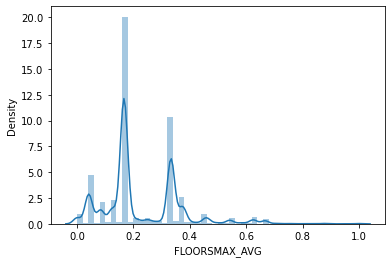

In [18]:
sns.distplot(application['FLOORSMAX_AVG'])
plt.show()

In [19]:
# Since the values in this column is not normally distributed 
# we will replace missing values with median
application['FLOORSMAX_AVG'].fillna(application['FLOORSMAX_AVG'].median, inplace=True)

In [20]:
application['FLOORSMAX_AVG'].isna().sum()

0

In [21]:
# FLOORSMAX_MEDI
application['FLOORSMAX_MEDI'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MEDI, dtype: float64

In [22]:
application['FLOORSMAX_MEDI'].describe()

count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64

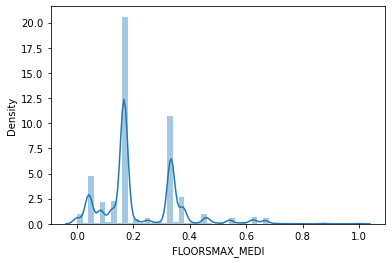

In [23]:
sns.distplot(application['FLOORSMAX_MEDI'])
plt.show()

In [24]:
# Since the values in this column is not normally distributed 
# we will replace missing values with median
application['FLOORSMAX_MEDI'].fillna(application['FLOORSMAX_MEDI'].median,inplace=True)

In [25]:
application['FLOORSMAX_MEDI'].isna().sum()

0

In [26]:
#FLOORSMAX_MODE 
application['FLOORSMAX_MODE'].head()

0    0.0833
1    0.2917
2       NaN
3       NaN
4       NaN
Name: FLOORSMAX_MODE, dtype: float64

In [27]:
application['FLOORSMAX_MODE'].describe()

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

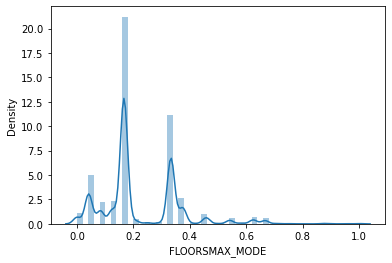

In [28]:
sns.distplot(application['FLOORSMAX_MODE'])
plt.show()

In [29]:
# Since the values in this column is not normally distributed 
# we will replace missing values with median
application['FLOORSMAX_MODE'].fillna(application['FLOORSMAX_MODE'].median,inplace=True)

In [30]:
application['FLOORSMAX_MODE'].isna().sum()

0

In [31]:
#YEARS_BEGINEXPLUATATION_AVG 
application['YEARS_BEGINEXPLUATATION_AVG'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

In [32]:
application['YEARS_BEGINEXPLUATATION_AVG'].describe()

count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64

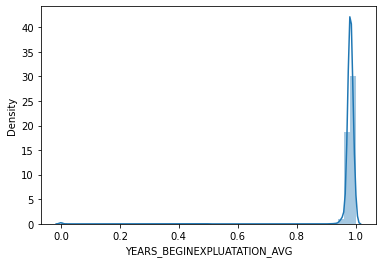

In [33]:
sns.distplot(application['YEARS_BEGINEXPLUATATION_AVG'])
plt.show()

In [34]:
# Since the mode and mean of this column is almost same 
# we will replace missing values with mean
application['YEARS_BEGINEXPLUATATION_AVG'].fillna(application['YEARS_BEGINEXPLUATATION_AVG'].mean,inplace=True)

In [35]:
application['YEARS_BEGINEXPLUATATION_AVG'].isna().sum()

0

In [36]:
#YEARS_BEGINEXPLUATATION_MEDI
application['YEARS_BEGINEXPLUATATION_MEDI'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

In [37]:
application['YEARS_BEGINEXPLUATATION_MEDI'].describe()

count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64

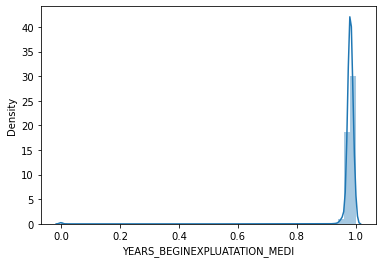

In [38]:
sns.distplot(application['YEARS_BEGINEXPLUATATION_MEDI'])
plt.show()

In [39]:
# Since the mode and mean of this column is almost same 
# we will replace NaN values with mean
application['YEARS_BEGINEXPLUATATION_MEDI'].fillna(application['YEARS_BEGINEXPLUATATION_MEDI'].mean,inplace=True)

In [40]:
application['YEARS_BEGINEXPLUATATION_MEDI'].isna().sum()

0

In [41]:
#YEARS_BEGINEXPLUATATION_MODE
application['YEARS_BEGINEXPLUATATION_MODE'].head()

0    0.9722
1    0.9851
2       NaN
3       NaN
4       NaN
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

In [42]:
application['YEARS_BEGINEXPLUATATION_MODE'].describe()

count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64

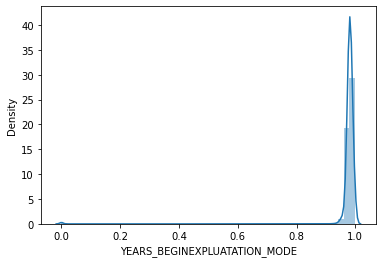

In [43]:
sns.distplot(application['YEARS_BEGINEXPLUATATION_MODE'])
plt.show()

In [44]:
# Since the mode and mean of this column is almost same 
# we will replace NaN values with mean
application['YEARS_BEGINEXPLUATATION_MODE'].fillna(application['YEARS_BEGINEXPLUATATION_MODE'].mean,inplace=True)

In [45]:
application['YEARS_BEGINEXPLUATATION_MODE'].isna().sum()

0

In [46]:
#TOTALAREA_MODE
application['TOTALAREA_MODE'].head()

0    0.0149
1    0.0714
2       NaN
3       NaN
4       NaN
Name: TOTALAREA_MODE, dtype: float64

In [47]:
application['TOTALAREA_MODE'].describe()

count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

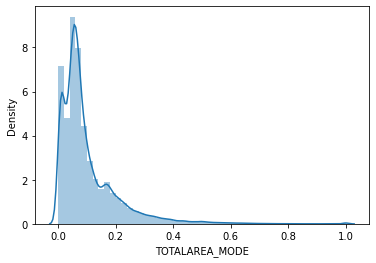

In [48]:
sns.distplot(application['TOTALAREA_MODE'])
plt.show()

In [49]:
# Since the values in this column is not normally distributed 
# we will replace missing values with median
application['TOTALAREA_MODE'].fillna(application['TOTALAREA_MODE'].median,inplace=True)

In [50]:
application['TOTALAREA_MODE'].isna().sum()

0

In [51]:
#EMERGENCYSTATE_MODE
application['EMERGENCYSTATE_MODE'].head()

0     No
1     No
2    NaN
3    NaN
4    NaN
Name: EMERGENCYSTATE_MODE, dtype: object

In [52]:
application['EMERGENCYSTATE_MODE'].value_counts(dropna=False)

No     159428
NaN    145755
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

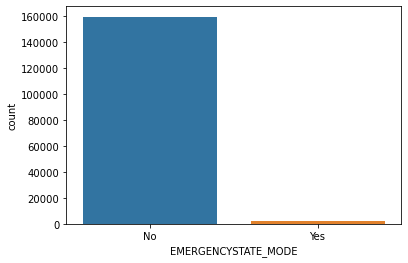

In [53]:
sns.countplot(x='EMERGENCYSTATE_MODE',data=application)
plt.show()

In [54]:
# we will replace missing values with mode of the column
application['EMERGENCYSTATE_MODE'].fillna(application['EMERGENCYSTATE_MODE'].mode()[0],inplace=True)

In [55]:
application['EMERGENCYSTATE_MODE'].value_counts(dropna=False)

No     305183
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [56]:
#OCCUPATION_TYPE 
application['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

In [57]:
application['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

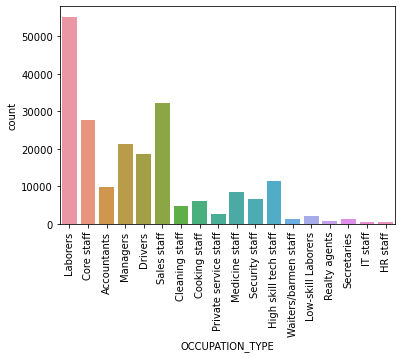

In [58]:
sns.countplot(x='OCCUPATION_TYPE',data=application)
plt.xticks(rotation=90)
plt.show()

Since we are not sure about the missing values in the occupation_type, we will consider that it may not be a mandatory filed in the application hence the applicants prefere not to fill it. 

In [59]:
#EXT_SOURCE_3
application['EXT_SOURCE_3'].head()

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
Name: EXT_SOURCE_3, dtype: float64

In [60]:
application['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

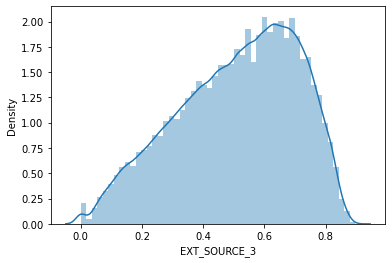

In [61]:
sns.distplot(application['EXT_SOURCE_3'])
plt.show()

Since this is skewed distribution we will replace the missing values with meadian of the column

In [62]:
# Replacing missing value with median
application['EXT_SOURCE_3'].fillna(application['EXT_SOURCE_3'].median,inplace=True)

In [63]:
application['EXT_SOURCE_3'].isna().sum()

0

In [64]:
application['AMT_REQ_CREDIT_BUREAU_YEAR'].head()

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [65]:
application['AMT_REQ_CREDIT_BUREAU_YEAR'].unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

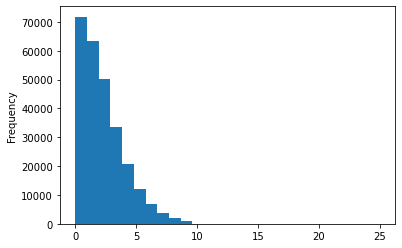

In [66]:
num_unique=len(application['AMT_REQ_CREDIT_BUREAU_YEAR'].unique())
application['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins=num_unique)
plt.show()

In [67]:
application['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [68]:
# Since the values in this columns needs to be discrete values
# we will replace missing values with mode
application['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0],inplace=True)

In [69]:
application['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()

0

In [70]:
application['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

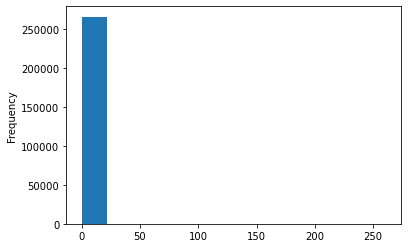

In [71]:
#AMT_REQ_CREDIT_BUREAU_QRT
num_unique=len(application['AMT_REQ_CREDIT_BUREAU_QRT'].unique())
application['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins=num_unique)
plt.show()

In [72]:
application['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [73]:
# Since the values in this columns needs to be discrete values
# we will replace missing values with mode
application['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0],inplace=True)

In [74]:
application['AMT_REQ_CREDIT_BUREAU_QRT'].isna().sum()

0

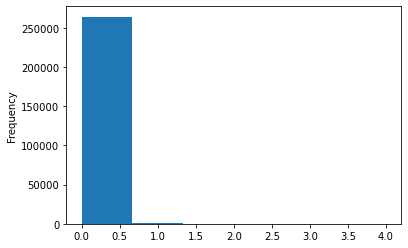

In [75]:
#AMT_REQ_CREDIT_BUREAU_HOUR      
num_unique=len(application['AMT_REQ_CREDIT_BUREAU_HOUR'].unique())
application['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(bins=num_unique)
plt.show()

In [76]:
application['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [77]:
# Since the values in this columns needs to be discrete values
# we will replace missing values with mode
application['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0],inplace=True)

In [78]:
application['AMT_REQ_CREDIT_BUREAU_HOUR'].isna().sum()

0

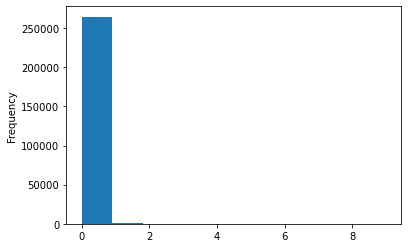

In [79]:
#AMT_REQ_CREDIT_BUREAU_DAY       
num_unique=len(application['AMT_REQ_CREDIT_BUREAU_DAY'].unique())
application['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist(bins=num_unique)
plt.show()

In [80]:
application['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [81]:
# Since the values in this columns needs to be discrete values
# we will replace missing values with mode
application['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0],inplace=True)

In [82]:
application['AMT_REQ_CREDIT_BUREAU_DAY'].isna().sum()

0

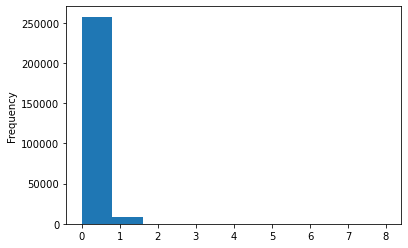

In [83]:
#AMT_REQ_CREDIT_BUREAU_WEEK
num_unique=len(application['AMT_REQ_CREDIT_BUREAU_WEEK'].unique())
application['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(bins=num_unique)
plt.show()

In [84]:
application['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [85]:
# Since the values in this columns needs to be discrete values
# we will replace missing values with mode
application['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0],inplace=True)

In [86]:
application['AMT_REQ_CREDIT_BUREAU_WEEK'].isna().sum()

0

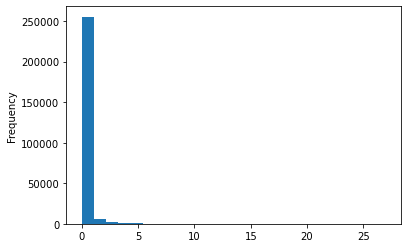

In [87]:
#AMT_REQ_CREDIT_BUREAU_MON
num_unique=len(application['AMT_REQ_CREDIT_BUREAU_MON'].unique())
application['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(bins=num_unique)
plt.show()

In [88]:
application['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [89]:
# Since the values in this columns needs to be discrete values
# we will replace missing values with mode
application['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0],inplace=True)

In [90]:
application['AMT_REQ_CREDIT_BUREAU_MON'].isna().sum()

0

In [91]:
application.columns[application.isnull().any()].tolist()

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [92]:
# As AMT_ANNUITY,CNT_FAM_MEMBERS columns has very,very few NaN values, we can fill it with mean value
application['AMT_ANNUITY'].fillna((application['AMT_ANNUITY'].mean()), inplace=True)
application['CNT_FAM_MEMBERS'].fillna((application['CNT_FAM_MEMBERS'].mean()), inplace=True)
application['DAYS_LAST_PHONE_CHANGE'].fillna((application['DAYS_LAST_PHONE_CHANGE'].mean()), inplace=True)
#Since 'AMT_GOODS_PRICE' ,'EXT_SOURCE_2' has very low NaN values we can fill it with mean value
application['AMT_GOODS_PRICE'].fillna((application['AMT_GOODS_PRICE'].mean()), inplace=True)
application['EXT_SOURCE_2'].fillna((application['EXT_SOURCE_2'].mean()), inplace=True)

In [93]:
# We will fill the NaN values of the columns with it's mode  
application['NAME_TYPE_SUITE'].fillna(application['NAME_TYPE_SUITE'].mode()[0],inplace=True)
application['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0],inplace=True)
application['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0],inplace=True)
application['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0],inplace=True)
application['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0],inplace=True)

# Dataset is Clean

### Univariate Analysis

#### Target

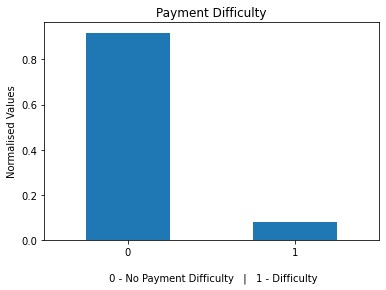

In [94]:
application.TARGET.value_counts(normalize=True).plot.bar()
plt.title("Payment Difficulty")
plt.xlabel("\n 0 - No Payment Difficulty   |   1 - Difficulty")
plt.xticks(rotation =0)
plt.ylabel("Normalised Values")
plt.show()

In [95]:
#checking exact Target 0 to Target 1 ratio
application[application.TARGET==0].shape[0]/application[application.TARGET==1].shape[0]


11.387150050352467

We can see from the above value that 1 in every 11 applicant has payment difficulty.
Due to this imbalance, we will separate out the data with target=0 and target=1 and we will analyze it individually to find relationships if any.


In [96]:
# Categorical variables 
train_categorical=application.select_dtypes(include=['object']).columns
train_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [97]:
# Selecting few columns form the categorical variables
app_categorical=application[['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']]


Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64


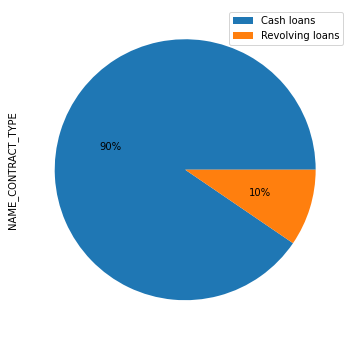

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


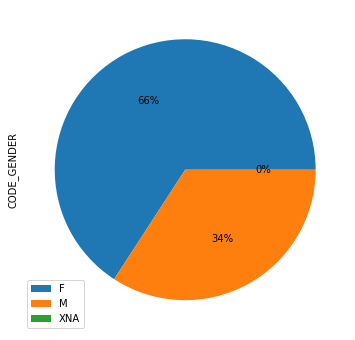

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


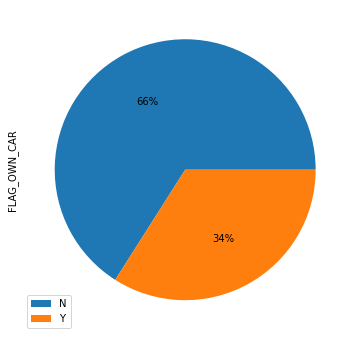

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


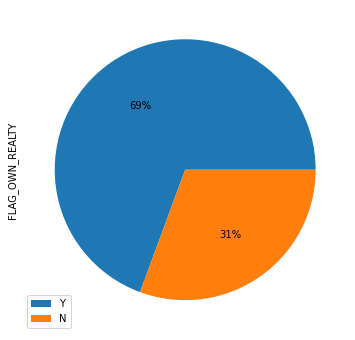

Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64


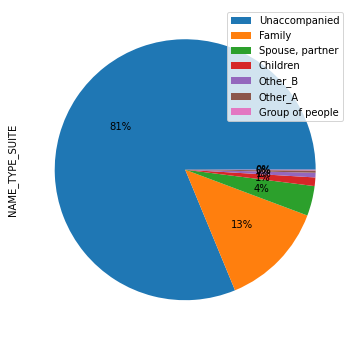

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


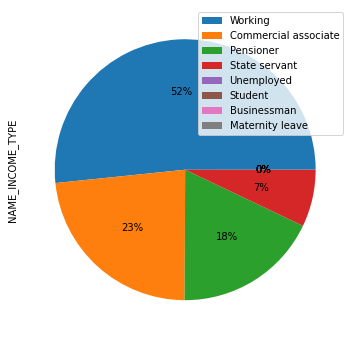

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


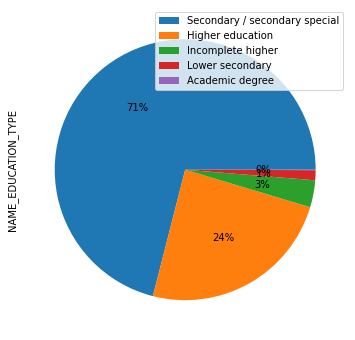

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64


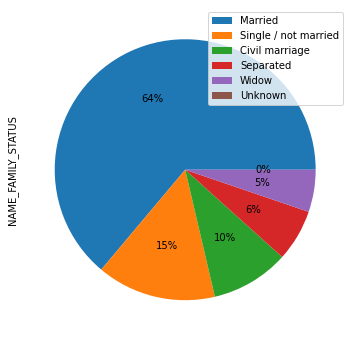

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


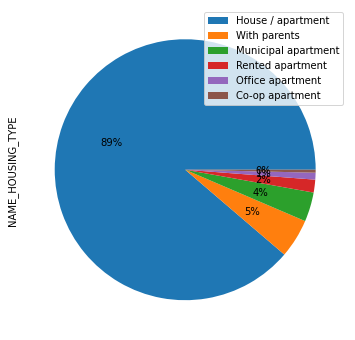

NaN                      0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64


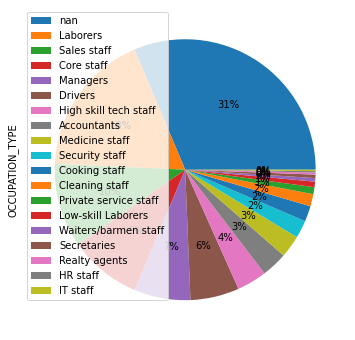

TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


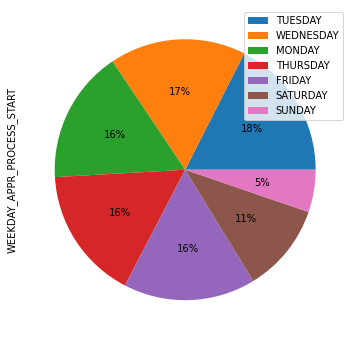

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

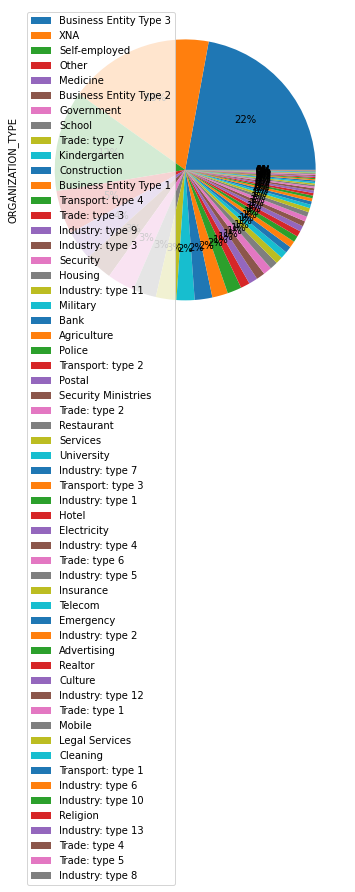

In [98]:
#checking categorical variables and their values
for i in app_categorical.columns:
    if app_categorical[i].dtype=='object':
        print(app_categorical[i].value_counts(normalize=True, dropna=False))
        plt.figure(figsize=[6,6])
        app_categorical[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None,autopct = "%1.0f%%")
        plt.legend()
        plt.show()

#### Observations
1.Cash loans offered are more than revolving loans, at 90%

2.66% Females have taken loans in comparison to 34% male. (This is very interesting and needs to be studied further)

3.66% applicant dont own cars

4.69% applicants own living quarters

5.81% applicants came Unaccompanied for loan application

6.While most applicants are working class, 18% are pensioners

7.71% have secondary education

8.64% are married

9.31% have not mentioned their occupation type

10.22% applicant belong to bussiness entity type3 

In [99]:
application['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [100]:
#FLAG_OWN_CAR' & 'FLAG_OWN_REALTY' needs to be changed to Binary from yes/no

application['OWN_CAR_flag']=np.where(application.FLAG_OWN_CAR =="Y",1,0)
application['OWN_REALTY_flag']= np.where(application.FLAG_OWN_REALTY =="Y",1,0)
application['OWN_CAR_flag'].value_counts()

0    202924
1    104587
Name: OWN_CAR_flag, dtype: int64

In [101]:
application.OWN_REALTY_flag.dtype


dtype('int32')

## Numerical Variable 

In [102]:
application.columns[application.dtypes=="int64"].tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [103]:
##Deleting all the Flag columns 

for i in application.columns:
    if i.startswith("FLAG"):
        application.drop(columns=i, inplace=True)
        
application.shape

(307511, 55)

#### Standardising

DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH needs to be absolute values

In [104]:
#Converting DAYS_BIRTH to positive and converting days to years. 
#renamed to AGE_IN_YEARS
application.DAYS_BIRTH=application.DAYS_BIRTH.apply(lambda x: abs(x//365.25))
application.rename({'DAYS_BIRTH':'AGE_IN_YEARS'}, axis=1, inplace=True)
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   CNT_CHILDREN                  307511 non-null  int64  
 5   AMT_INCOME_TOTAL              307511 non-null  float64
 6   AMT_CREDIT                    307511 non-null  float64
 7   AMT_ANNUITY                   307511 non-null  float64
 8   AMT_GOODS_PRICE               307511 non-null  float64
 9   NAME_TYPE_SUITE               307511 non-null  object 
 10  NAME_INCOME_TYPE              307511 non-null  object 
 11  NAME_EDUCATION_TYPE           307511 non-null  object 
 12  NAME_FAMILY_STATUS            307511 non-nul

In [105]:
# Binning AGE and Creating new column "AGE_GROUP"

application['AGE_GROUP']= pd.cut(application.AGE_IN_YEARS,bins=[15,25,35,45,55,65,75])

application['AGE_GROUP'].value_counts(normalize=True)

(35, 45]    0.274010
(25, 35]    0.235533
(45, 55]    0.228252
(55, 65]    0.196812
(15, 25]    0.039781
(65, 75]    0.025612
Name: AGE_GROUP, dtype: float64

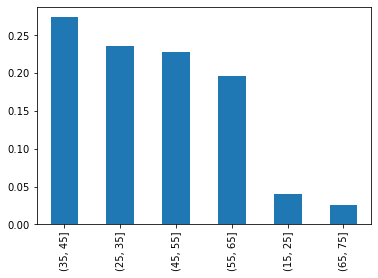

In [106]:
application['AGE_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

35-45 Age group is the largest Group of Age applying for loans. This may be attributed to consumerism aspect at that age.

In [107]:
# Binning 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP"

application['INCOME_GROUP']= pd.qcut(application['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])

application['INCOME_GROUP'].value_counts(normalize=True)

Medium      0.274143
High        0.245562
Low         0.218486
VeryHigh    0.153224
VeryLow     0.108585
Name: INCOME_GROUP, dtype: float64

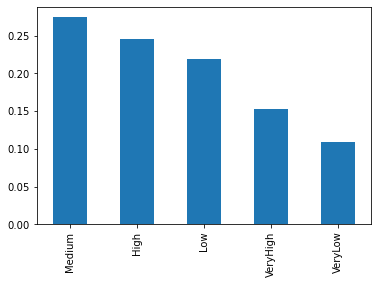

In [108]:
application['INCOME_GROUP'].value_counts(normalize=True).plot.bar()
plt.show()

Medium Income group is the largest Group applying for loans.

In [109]:
#DAYS_REGISTRATION, DAYS_ID_PUBLISH to positive numbers and change to years. Columns Renamed


application.DAYS_REGISTRATION = application.DAYS_REGISTRATION.apply(lambda x: abs(x//365.25))
application.DAYS_ID_PUBLISH = application.DAYS_ID_PUBLISH.apply(lambda x: abs(x//365.25))
application.rename({'DAYS_REGISTRATION':'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, axis=1, inplace=True)


In [110]:
#DAYS_LAST_PHONE_CHANGE to positive
application.DAYS_LAST_PHONE_CHANGE = application.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))


In [111]:
application.DAYS_EMPLOYED=application.DAYS_EMPLOYED.apply(lambda x: abs(x//365.25))
application.rename({'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, axis=1, inplace=True)

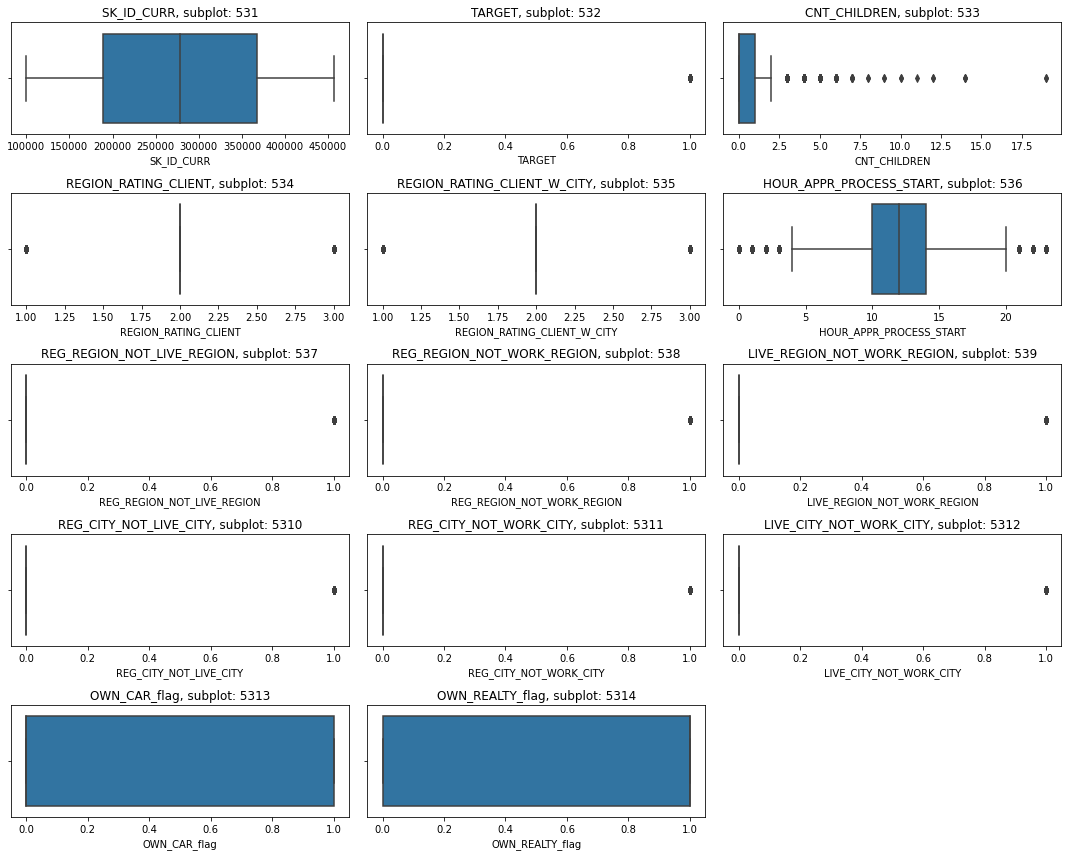

In [112]:
# INT Data - Analysis by plotting Box plots
a = 5  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in application.columns:
    if application[i].dtypes=="int64" or application[i].dtypes=="int32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(application[i])
        c = c + 1

fig.tight_layout()
plt.show()

Since we can observe an outliers in CNT_CHILDREN, we will do further inspection.

In [113]:
application.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [114]:
application['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

There are few observation with really high number of children. Since we are not sure if that is an error we will not make any changes. 

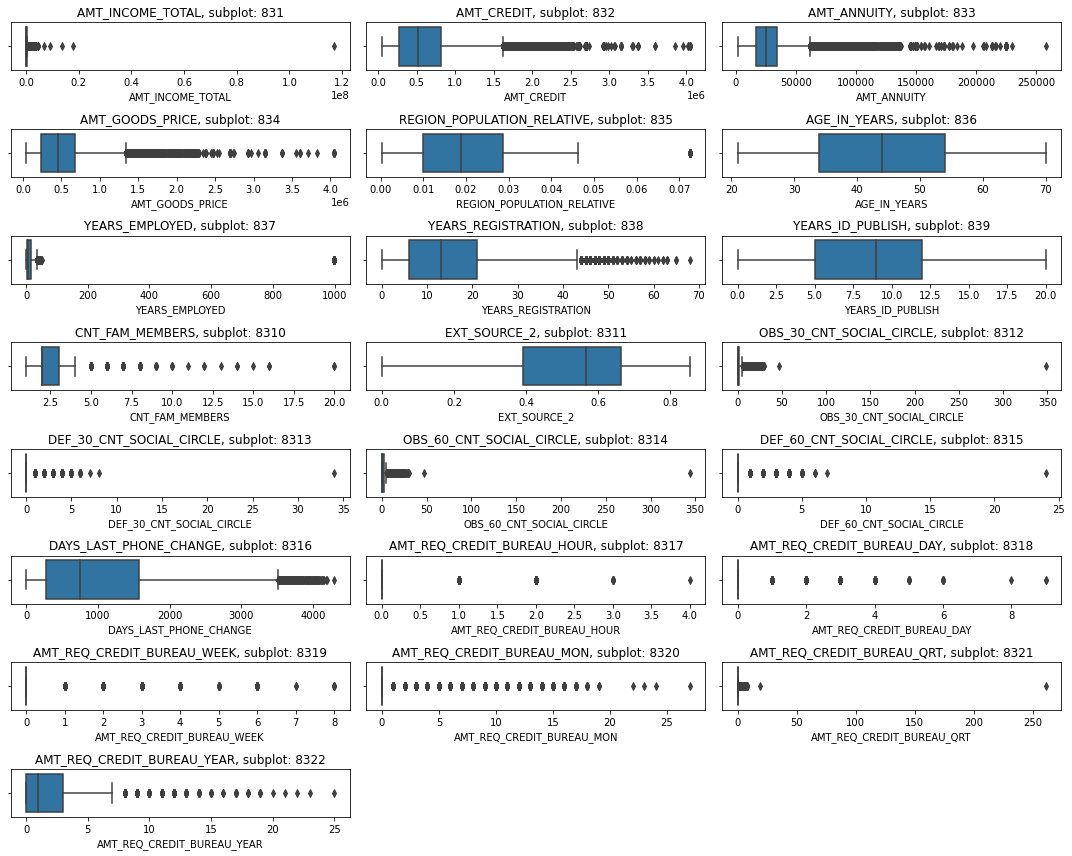

In [115]:
#  Float Data
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,12))

for i in application.columns:
    if application[i].dtypes=="float64" or application[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(application[i])
        c = c + 1

fig.tight_layout()
plt.show()

We can observe the Outliers in ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','YEARS_EMPLOYED',
'YEARS_REGISTRATION','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_QRT']

In [116]:
#checking value counts of columns with outliers
outlier_col=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','YEARS_EMPLOYED', 'YEARS_REGISTRATION','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_QRT']

for i in outlier_col:
    print("\n")
 
    print(application[i].describe())
    print("\n")
 
    print(application[i].value_counts( dropna=False, normalize=True))
    print("\n")
 



count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


135000.0    0.116256
112500.0    0.100871
157500.0    0.086358
180000.0    0.080384
90000.0     0.073113
              ...   
101119.5    0.000003
79425.0     0.000003
101128.5    0.000003
202275.0    0.000003
262174.5    0.000003
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: float64




count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


450000.0     0.031573
675000.0     0.028867
225000.0     0.026542
180000.0     0.023876
270000.0     0.023547
               ...   
827100.0     0.000003
413442.0     0.000003
1652458.5    0.000003
825853.5     0.000003
2097058.5    0.000003
Name: AMT_CREDIT, Length: 5603, dtype: f

In [117]:
#using zscore to find out Outliers (>97%)

for i in outlier_col:
    print( i, ":", end= " ")
    print(application.iloc[np.where(np.abs(ss.zscore(application[i])>2))].shape)
                   


AMT_INCOME_TOTAL : (1438, 57)
AMT_CREDIT : (12999, 57)
AMT_ANNUITY : (11475, 57)
AMT_GOODS_PRICE : (16073, 57)
REGION_POPULATION_RELATIVE : (8412, 57)
YEARS_EMPLOYED : (55374, 57)
YEARS_REGISTRATION : (11203, 57)
CNT_FAM_MEMBERS : (28704, 57)
OBS_30_CNT_SOCIAL_CIRCLE : (13518, 57)
DEF_30_CNT_SOCIAL_CIRCLE : (6838, 57)
OBS_60_CNT_SOCIAL_CIRCLE : (13215, 57)
DEF_60_CNT_SOCIAL_CIRCLE : (25769, 57)
DAYS_LAST_PHONE_CHANGE : (11957, 57)
AMT_REQ_CREDIT_BUREAU_QRT : (16713, 57)


We can replace these values with their respective median to get rid of skewness if we want.

### spliting the dataframe into two seprate dataframes

In [118]:
application_0 = application[application['TARGET']==0] # Dataframe with all the data related to non-defaulters
application_1 = application[application['TARGET']==1] # Dataframe with all the data related to defaulters

In [119]:
application_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 57 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    282686 non-null  int64   
 1   TARGET                        282686 non-null  int64   
 2   NAME_CONTRACT_TYPE            282686 non-null  object  
 3   CODE_GENDER                   282686 non-null  object  
 4   CNT_CHILDREN                  282686 non-null  int64   
 5   AMT_INCOME_TOTAL              282686 non-null  float64 
 6   AMT_CREDIT                    282686 non-null  float64 
 7   AMT_ANNUITY                   282686 non-null  float64 
 8   AMT_GOODS_PRICE               282686 non-null  float64 
 9   NAME_TYPE_SUITE               282686 non-null  object  
 10  NAME_INCOME_TYPE              282686 non-null  object  
 11  NAME_EDUCATION_TYPE           282686 non-null  object  
 12  NAME_FAMILY_STATUS            

In [120]:
application_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   SK_ID_CURR                    24825 non-null  int64   
 1   TARGET                        24825 non-null  int64   
 2   NAME_CONTRACT_TYPE            24825 non-null  object  
 3   CODE_GENDER                   24825 non-null  object  
 4   CNT_CHILDREN                  24825 non-null  int64   
 5   AMT_INCOME_TOTAL              24825 non-null  float64 
 6   AMT_CREDIT                    24825 non-null  float64 
 7   AMT_ANNUITY                   24825 non-null  float64 
 8   AMT_GOODS_PRICE               24825 non-null  float64 
 9   NAME_TYPE_SUITE               24825 non-null  object  
 10  NAME_INCOME_TYPE              24825 non-null  object  
 11  NAME_EDUCATION_TYPE           24825 non-null  object  
 12  NAME_FAMILY_STATUS            24825 non-null 

In [121]:
categorical = ["object"]
Univariate_defaulter_Cat_1_df =application_1.select_dtypes(include=categorical)

In [122]:
Univariate_defaulter_Cat_1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   NAME_CONTRACT_TYPE            24825 non-null  object
 1   CODE_GENDER                   24825 non-null  object
 2   NAME_TYPE_SUITE               24825 non-null  object
 3   NAME_INCOME_TYPE              24825 non-null  object
 4   NAME_EDUCATION_TYPE           24825 non-null  object
 5   NAME_FAMILY_STATUS            24825 non-null  object
 6   NAME_HOUSING_TYPE             24825 non-null  object
 7   OCCUPATION_TYPE               18547 non-null  object
 8   WEEKDAY_APPR_PROCESS_START    24825 non-null  object
 9   ORGANIZATION_TYPE             24825 non-null  object
 10  EXT_SOURCE_3                  24825 non-null  object
 11  YEARS_BEGINEXPLUATATION_AVG   24825 non-null  object
 12  FLOORSMAX_AVG                 24825 non-null  object
 13  YEARS_BEGINEXPL

In [123]:
# Selecting few from the above to do analysis on categorical nominal variables
obj=Univariate_defaulter_Cat_1_df[['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START']]

In [124]:
def plotting(train, train0, train1, column):
    
    train = train
    application_0 = train0
    application_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    application = pd.DataFrame()
    application['0']= ((application_0[col].value_counts())/len(application_0))
    application['1']= ((application_1[col].value_counts())/len(application_1))
    application.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

Plotting  NAME_CONTRACT_TYPE


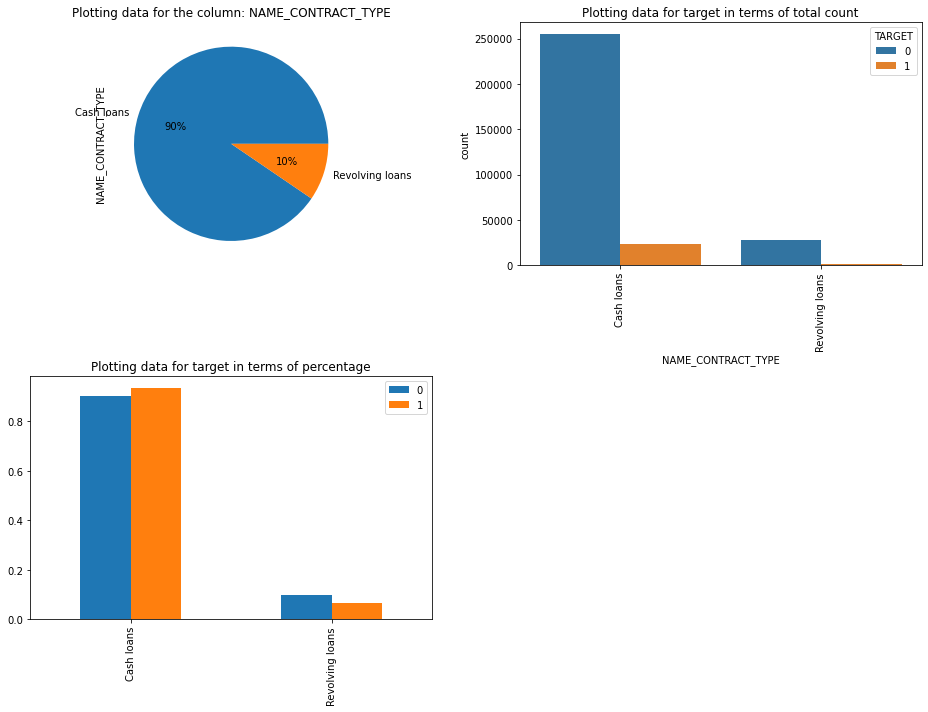

Plotting  CODE_GENDER


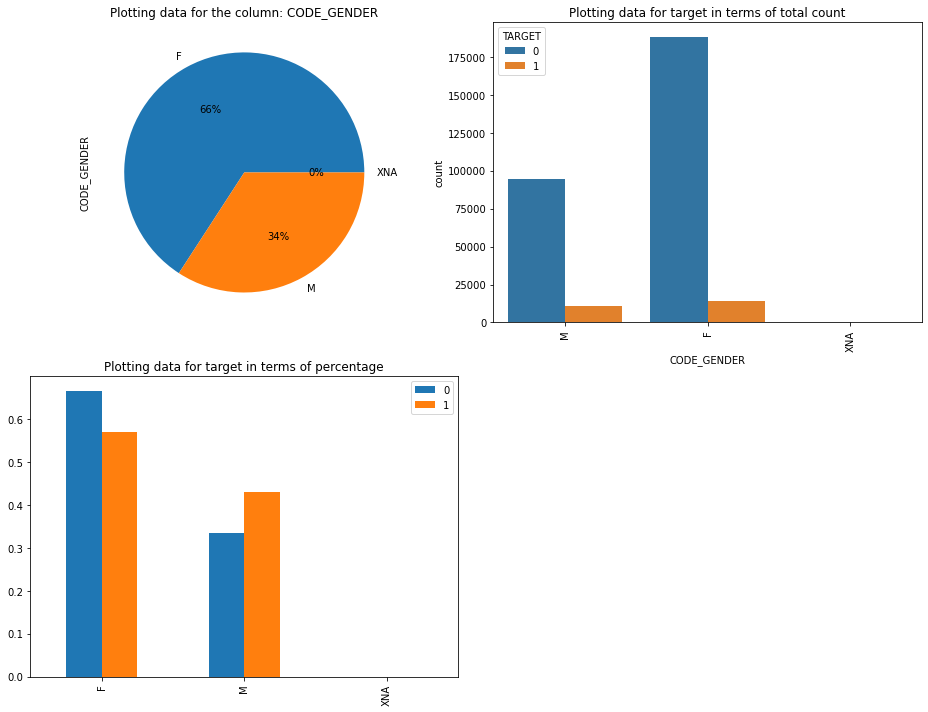

Plotting  NAME_TYPE_SUITE


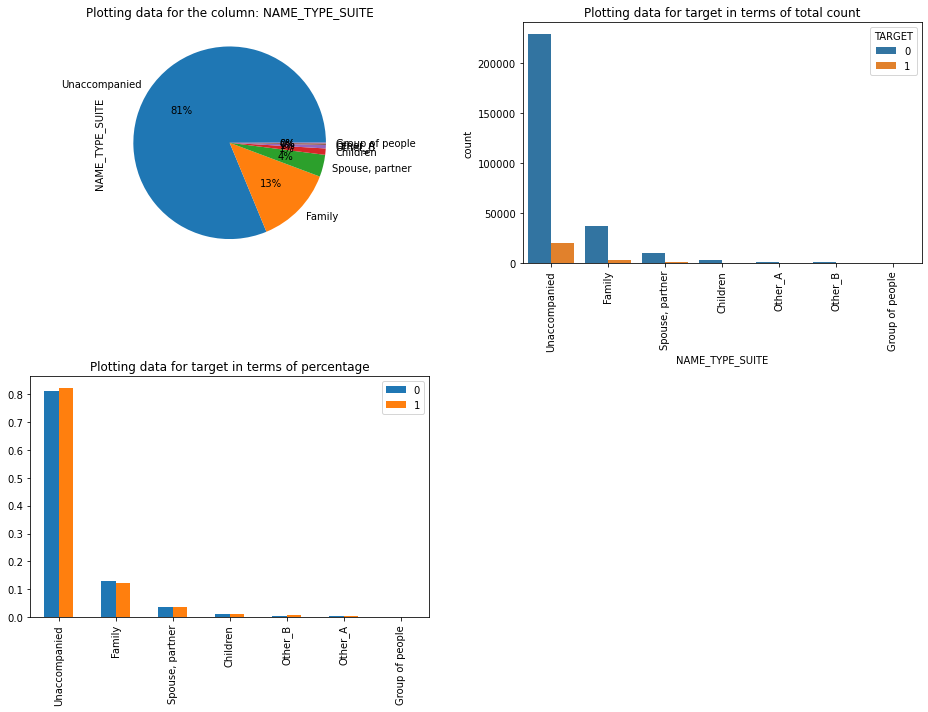

Plotting  NAME_INCOME_TYPE


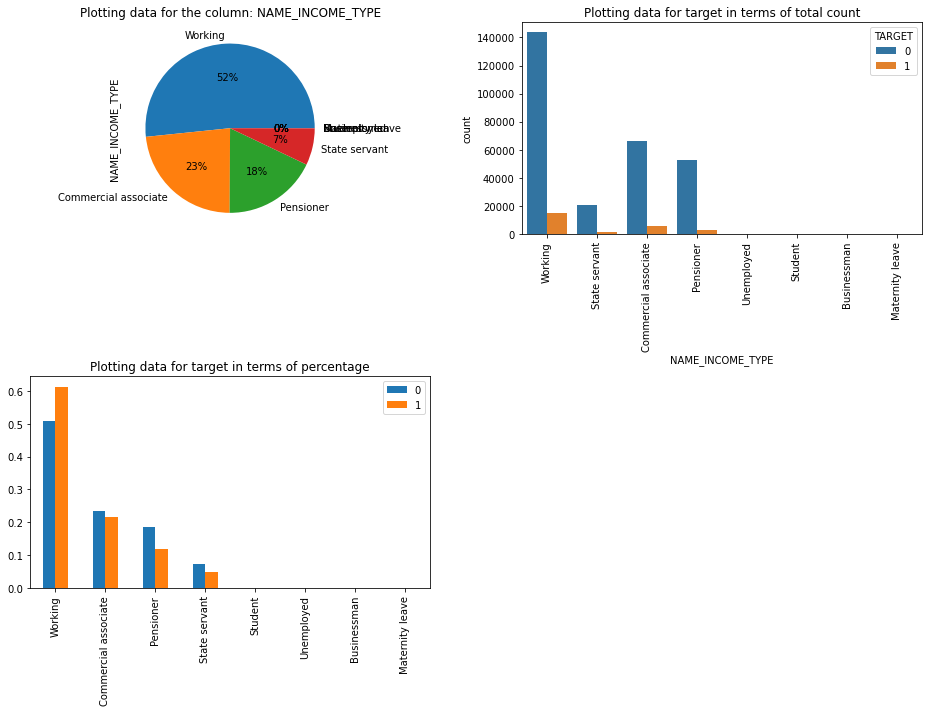

Plotting  NAME_EDUCATION_TYPE


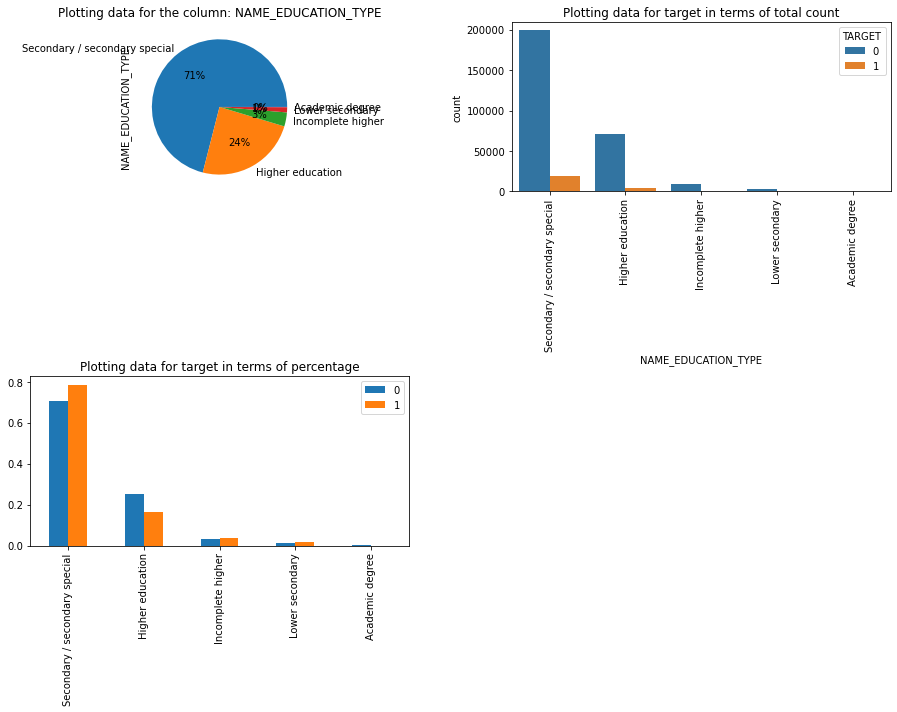

Plotting  NAME_FAMILY_STATUS


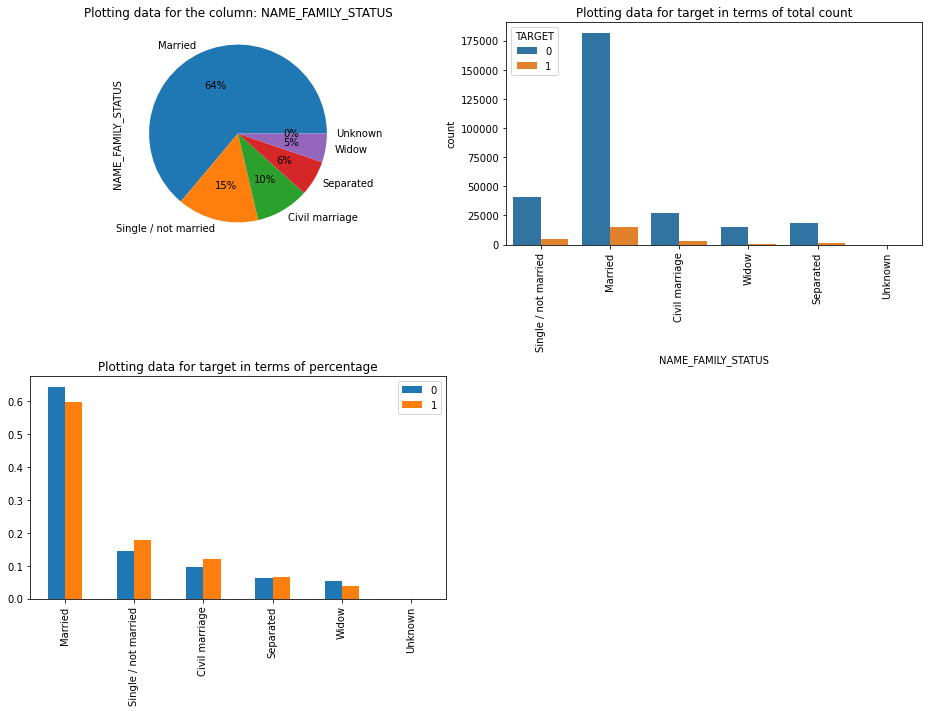

Plotting  NAME_HOUSING_TYPE


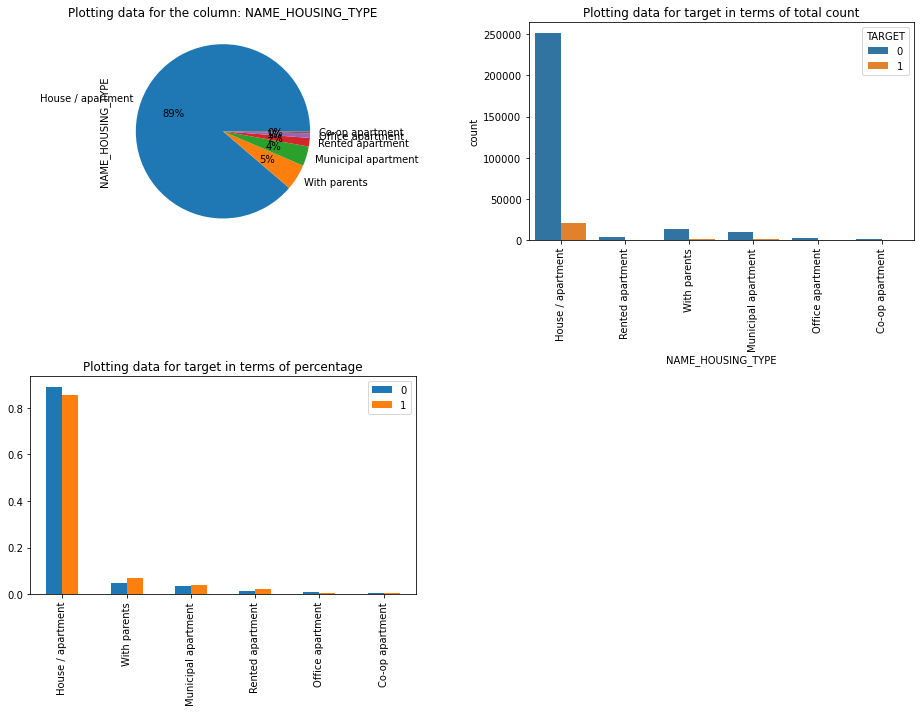

Plotting  OCCUPATION_TYPE


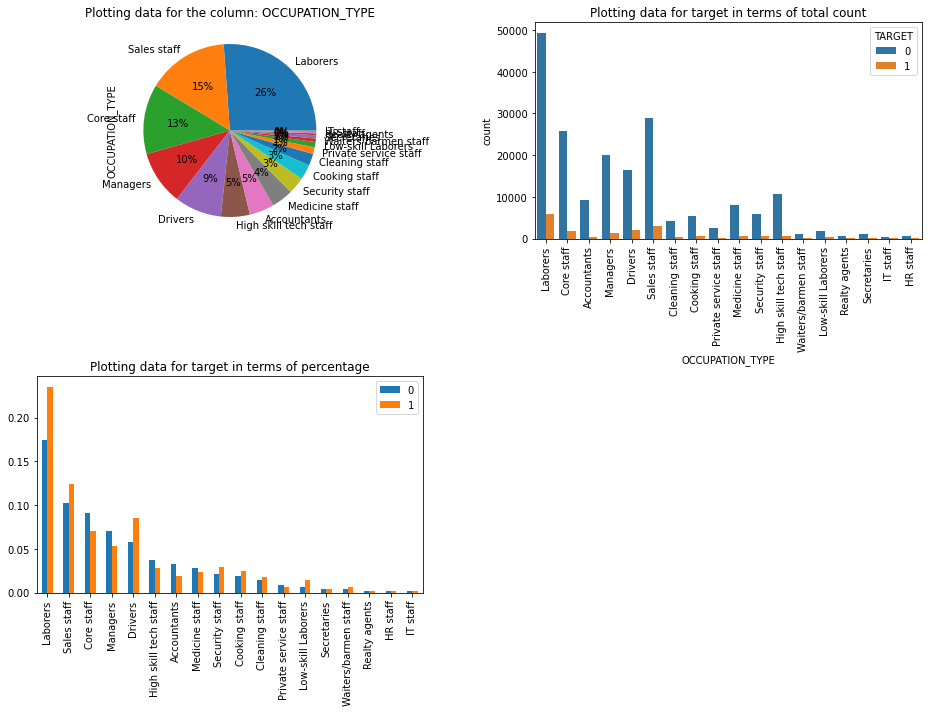

Plotting  WEEKDAY_APPR_PROCESS_START


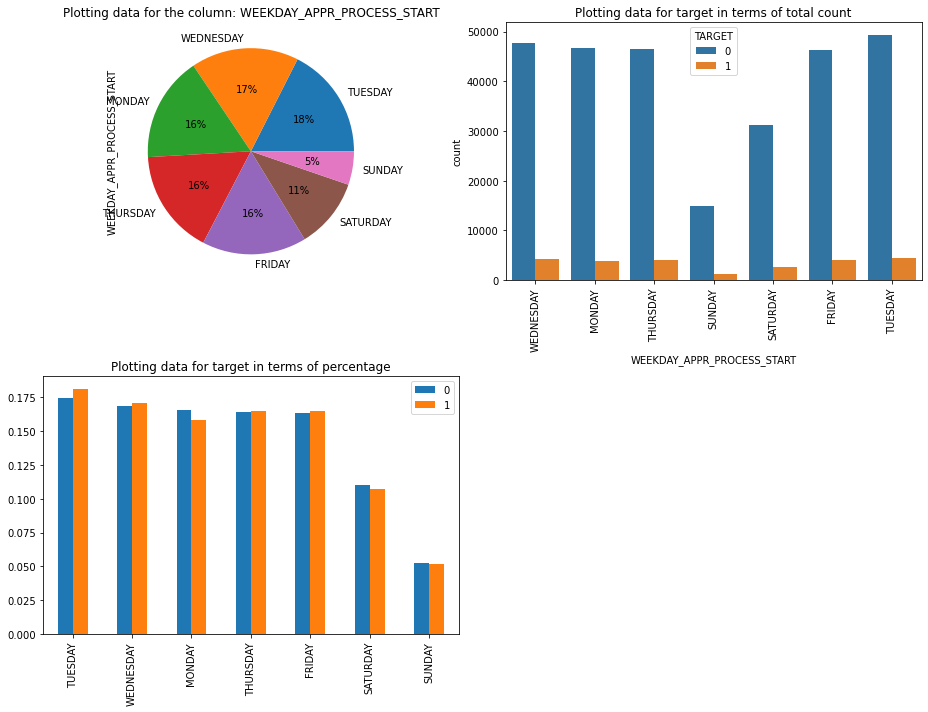

In [125]:
for column in obj:
    print("Plotting ",column)
    plotting(application, application_0, application_1, column)
    print("==========================================================")

Observations
1. NAME_CONTRACT TYPE- As we know from the previous analysis of the same variable that cash Loans account for the 90% of the Bank's portfolio. For Target 0 - 90% and almost 95% for Target-1 
2. CODE_GENDER - Though females are taking most of the loand but the rate of defualting is much lower than thier male counterparts. 
3. NAME_TYPE_SUIT - Since 80-90% in Target 0 and Target 1 are applying for loan Unaccompanied. Indicating, this is not a parameter that can influence payment default. 
4. NAME_INCOME_TYPE - Since working people are highest amongs all in that 50% working people are in case of Target 0 and 60%   are in case of Target1. Intersesting thing to note here is 3rd highest loan applicants are from pensioner category. 
5. NAME_EDUCATION_TYPE - In both Target 0 and 1, applicants with Secondary Education has applied for loans more than others.90% of defaulting payments are from applicants with secondary income. further analysis needed
6. NAME_FAMILY_STATUS - Almost 60% of maried individuals have defaulted on payments  
7. NAME_HOSUING_TYPE - Since 85-90% in Target 0 and Target 1 applicants are staying in "House/apartment". Indicating, this is not a parameter that can influence payment default. 
8. OCCUPATION_TYPE - Labourers, sales staff, core staff, drivers accounts for 50% of defaulters. Out of wich Labourers has the highest percentage of applicants too, followed by sales staff and Drivers respectively. 
9. WEEKDAY_APPR_PROCESS_START- Since its evenly distributed for Targer 0 and Target 1. Indicating, this is not a parameter that can influence payment default.



ORGANIZATION_TYPE

In [126]:
test1=round((Univariate_defaulter_Cat_1_df["ORGANIZATION_TYPE"].value_counts()/application["ORGANIZATION_TYPE"].value_counts())*100,2)

test1 = pd.DataFrame(test1)

test1.reset_index(level=0, inplace=True)
test1.sort_values(by=["ORGANIZATION_TYPE"],ascending=False,inplace=True)

test1.rename(columns=  {"index": "ORGANIZATION_TYPE", 
                     "ORGANIZATION_TYPE":"Default_Percentage"}, 
                                  inplace = True) 


test1

ORGANIZATION_TYPE  Default_Percentage
54       Transport: type 3               15.75
18       Industry: type 13               13.43
25        Industry: type 8               12.50
38              Restaurant               11.71
7             Construction               11.68
6                 Cleaning               11.15
14        Industry: type 1               11.07
20        Industry: type 3               10.62
36                 Realtor               10.61
1              Agriculture               10.47
47           Trade: type 3               10.34
42           Self-employed               10.17
21        Industry: type 4               10.15
40                Security                9.98
51           Trade: type 7                9.45
5   Business Entity Type 3                9.30
55       Transport: type 4                9.28
32                  Mobile                9.15
45           Trade: type 1                8.91
16       Industry: type 11                8.65
4   Business Entity Type 2                8.53
35                  Postal                8.44
0              Advertising                8.16
3   Business Entity Type 1                8.14
24        Industry: type 7                8.03
13                 Housing                7.94
29          Legal Services                7.87
53       Transport: type 2                7.80
33                   Other                7.64
44                 Telecom                7.63
19        Industry: type 2                7.21
23        Industry: type 6                7.14
10               Emergency                7.14
28            Kindergarten                7.03
46           Trade: type 2                7.00
11              Government                6.98
22        Industry: type 5                6.84
26        Industry: type 9                6.68
9              Electricity                6.63
43                Services                6.60
30                Medicine                6.58
15       Industry: type 10                6.42
12                   Hotel                6.42
49           Trade: type 5                6.12
39                  School                5.91
37                Religion                5.88
27               Insurance                5.70
8                  Culture                5.54
57                     XNA                5.40
2                     Bank                5.19
31                Military                5.13
34                  Police                5.00
56              University                4.90
41     Security Ministries                4.86
50           Trade: type 6                4.60
52       Transport: type 1                4.48
17       Industry: type 12                3.79
48           Trade: type 4                3.12

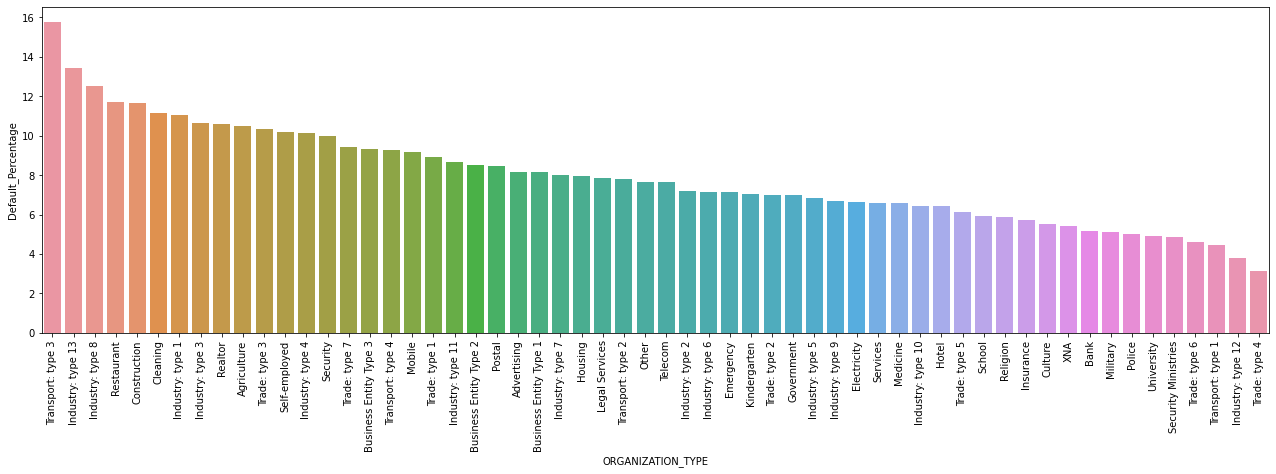

In [127]:
f, ax = plt.subplots(figsize=(22,6))
OrganizationType_vs_Target= sns.barplot(x="ORGANIZATION_TYPE",y="Default_Percentage",data=test1
                                         ,order=test1['ORGANIZATION_TYPE'])
OrganizationType_vs_Target.set_xticklabels(OrganizationType_vs_Target.get_xticklabels(), rotation=90)
OrganizationType_vs_Target
plt.show()

ORGANIZATION_TYPE - From above graph, highest percentage of defaulter can be seen in Applicants who work in Transport type3 followed by Industry type13 and industry type8.

Graph for :  REGION_RATING_CLIENT


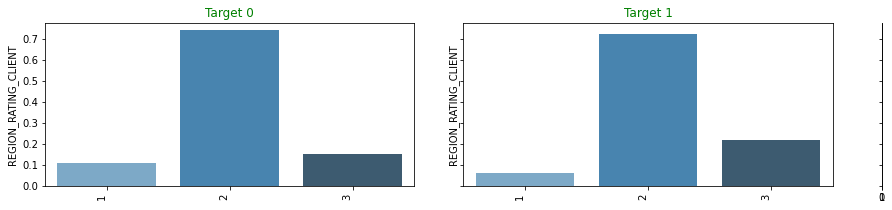

Graph for :  REGION_RATING_CLIENT_W_CITY


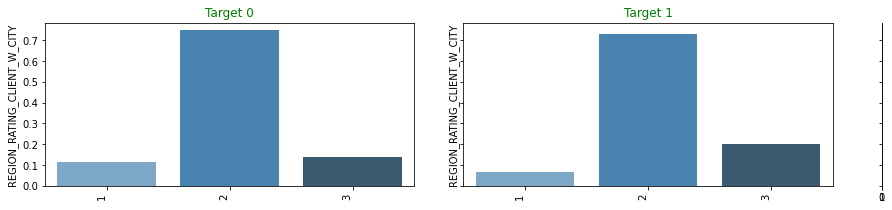

Graph for :  REG_REGION_NOT_LIVE_REGION


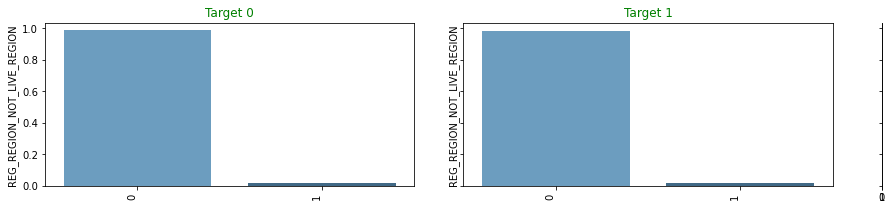

Graph for :  REG_REGION_NOT_WORK_REGION


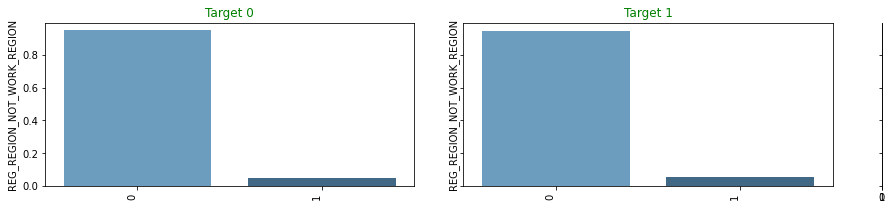

Graph for :  LIVE_REGION_NOT_WORK_REGION


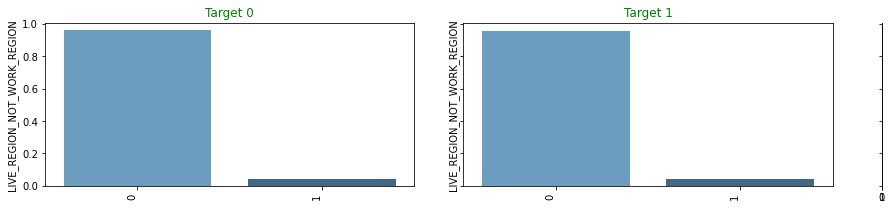

Graph for :  REG_CITY_NOT_LIVE_CITY


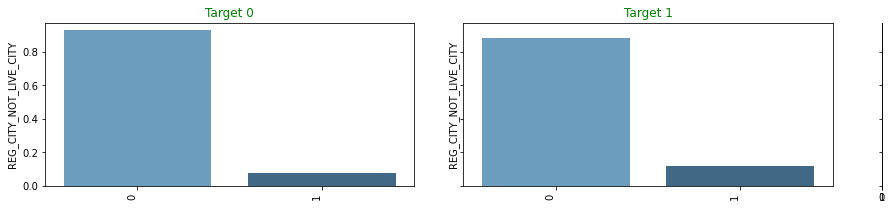

Graph for :  REG_CITY_NOT_WORK_CITY


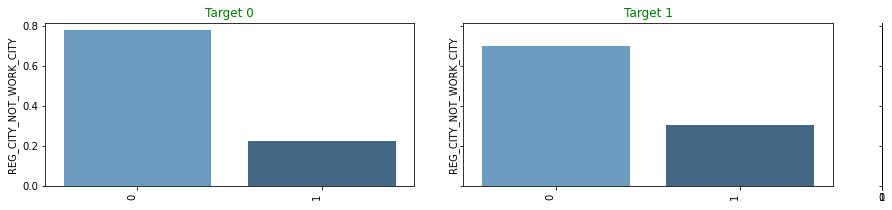

Graph for :  LIVE_CITY_NOT_WORK_CITY


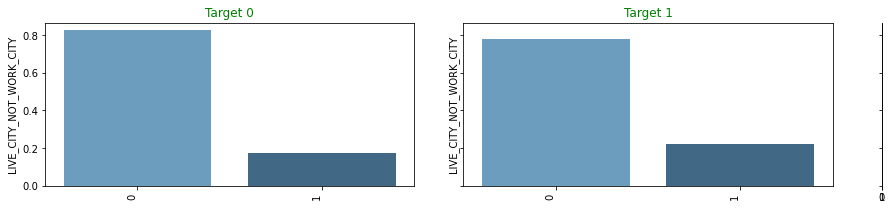

Graph for :  OWN_CAR_flag


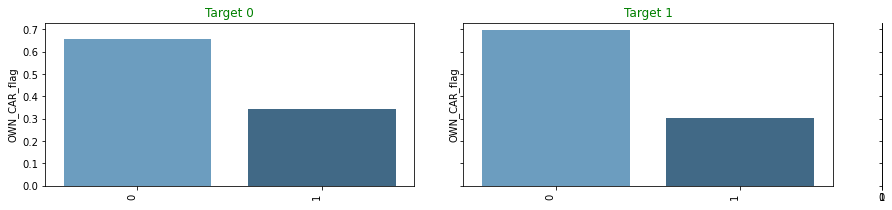

Graph for :  OWN_REALTY_flag


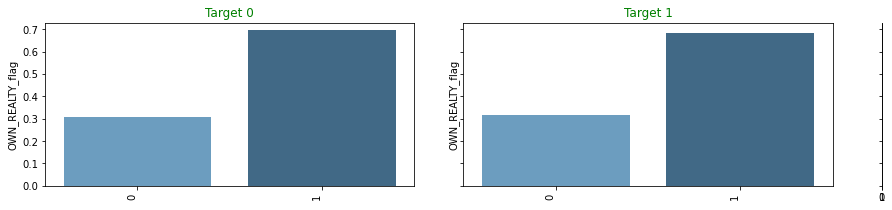

In [128]:
#Running loop and creating plots to analyse all Categorical ordered variables
cat=['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OWN_CAR_flag', 'OWN_REALTY_flag']

for i in cat:
    
    cat_num_0=application_0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,3))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(minor=False), rotation=90, horizontalalignment='right')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=application_1[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

Observations:
1. REGION_RATING_CLIENT'& 'REGION_RATING_CLIENT_W_CITY'- Region 2 has the highest % applicants both in TARGET 0 and Target 1
2. default ration is higher for applicant in columns REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY having address different from permanent address.   

Graph for :  AGE_GROUP


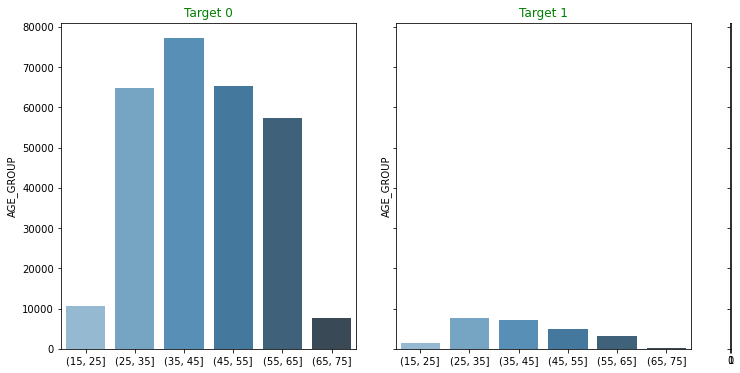

Graph for :  INCOME_GROUP


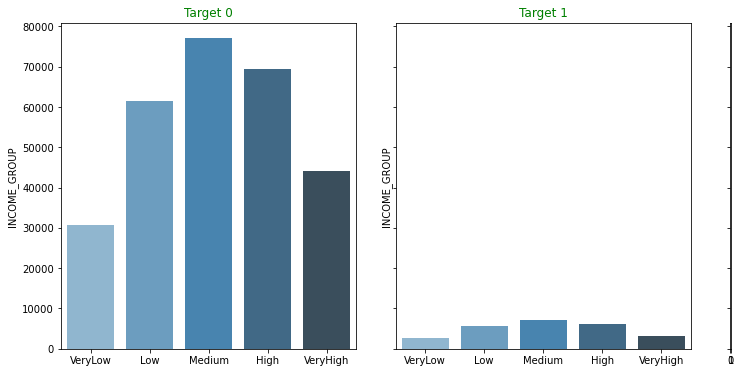

In [129]:
#Plotting Age_Group and Income_Group 

binList=["AGE_GROUP", "INCOME_GROUP"]
for i in binList:

    cat_num_0=application_0[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(12,6))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(), horizontalalignment='center')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=application_1[i].value_counts()
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), horizontalalignment='center')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

Observations:
1. AGE_GROUP - Since 25-35 age group tend to default more often. Company can be extra cautious before approving their loan. Though as age increases number of defaulters are decreasing, this might be because of increase in salary with as their year of experience increases..
2. INCOME_GROUP - Medium income group has largest number of defaulters and non-defaulters. 

In [130]:
# function to dist plot for continuous variables
def plotunidist(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a=application_0[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Target 0',fontsize=15)
            
    sns.distplot(a=application_1[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Target 1',fontsize=15)    
        
    plt.show()

In [131]:
Num=['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

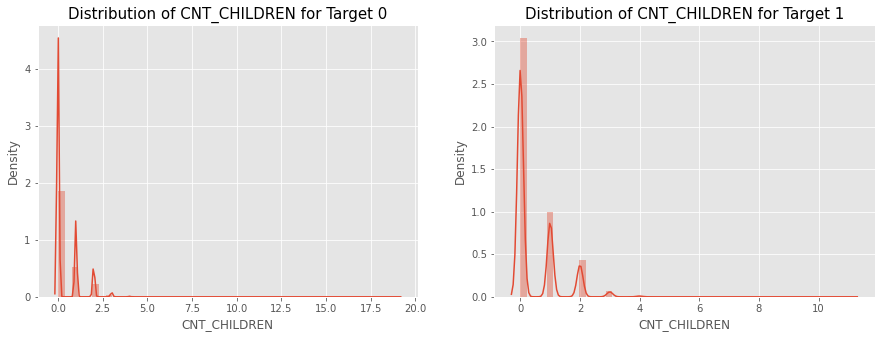

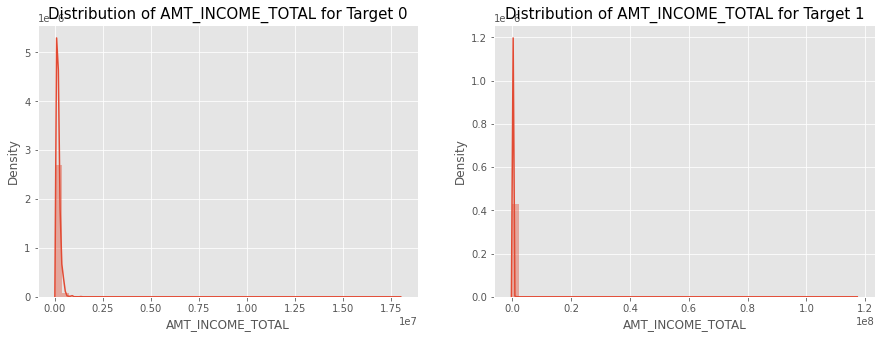

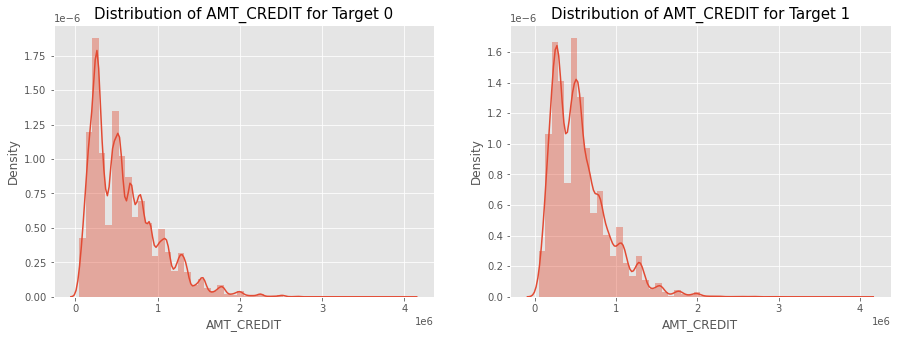

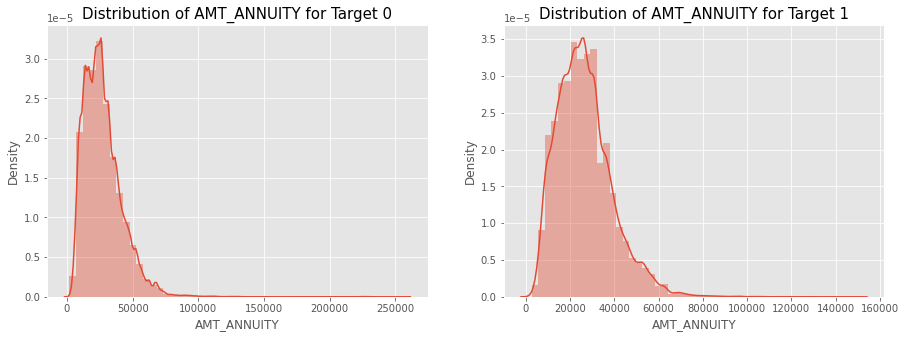

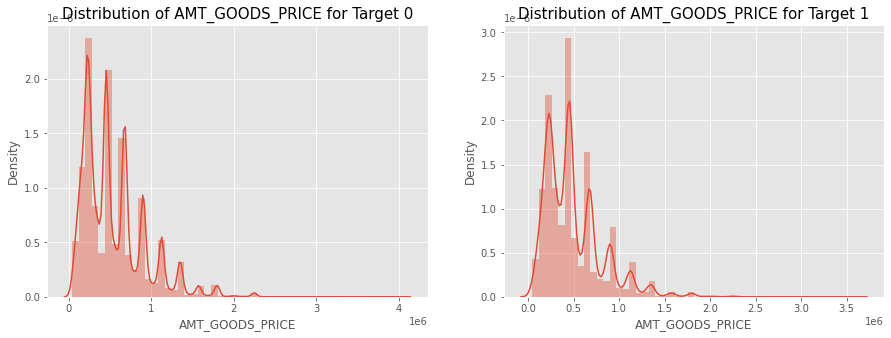

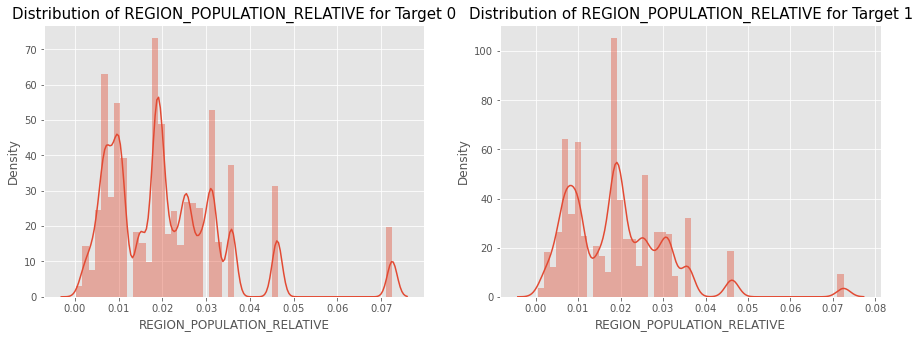

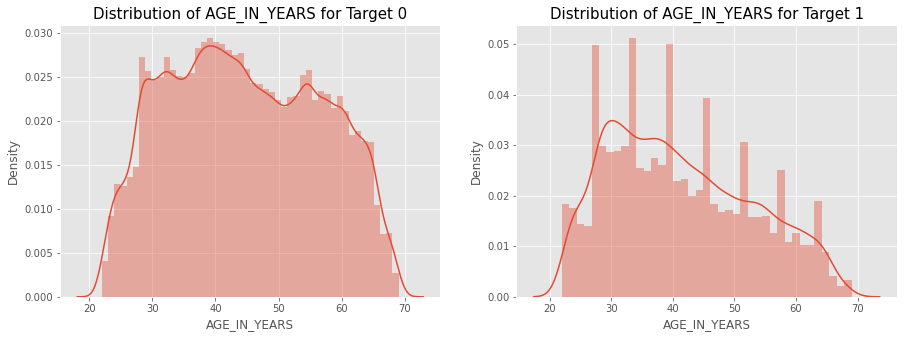

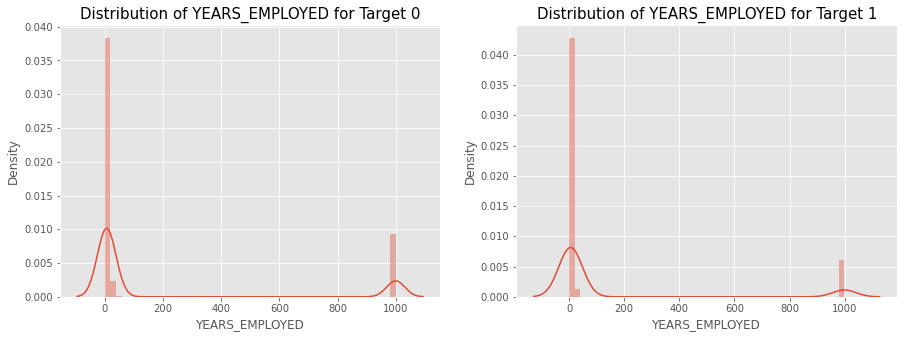

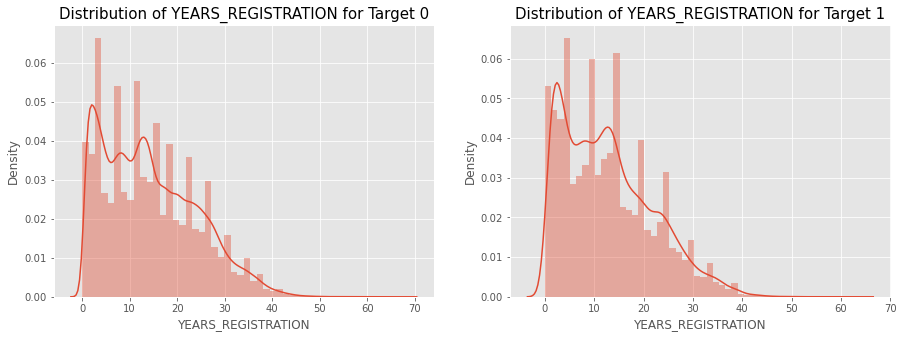

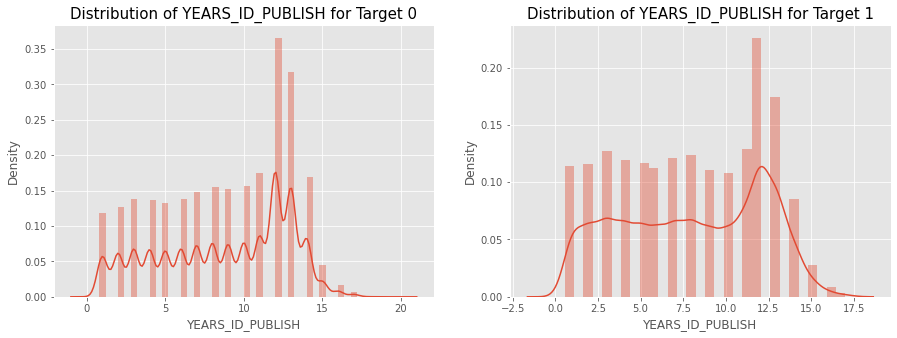

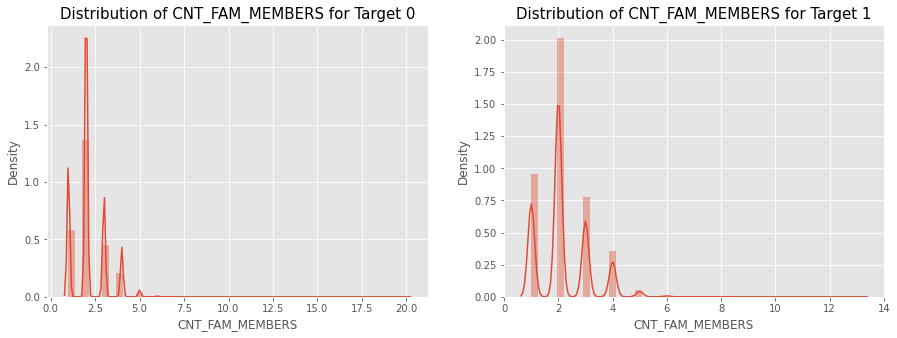

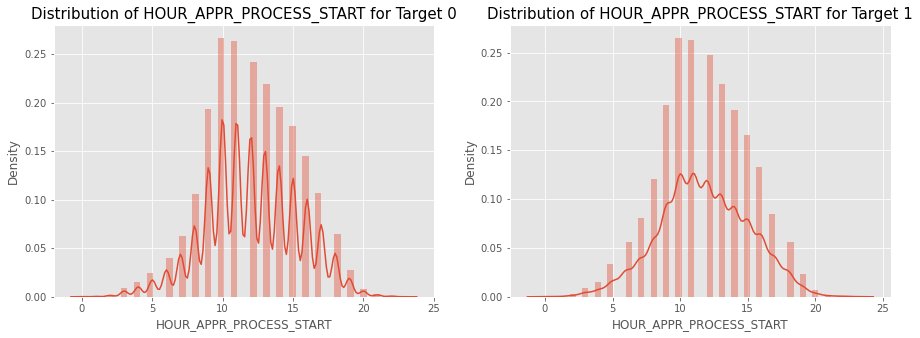

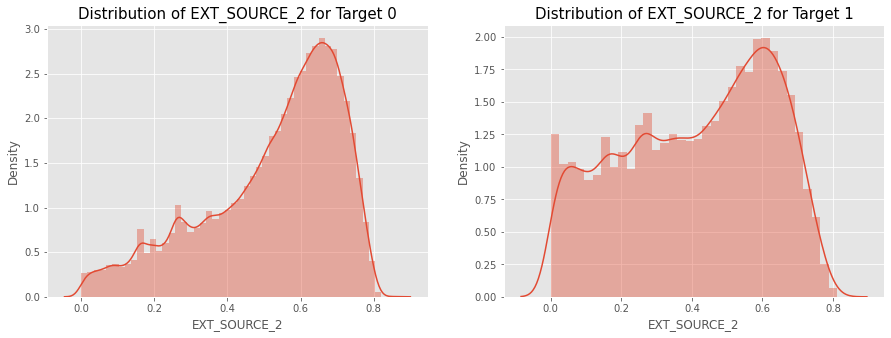

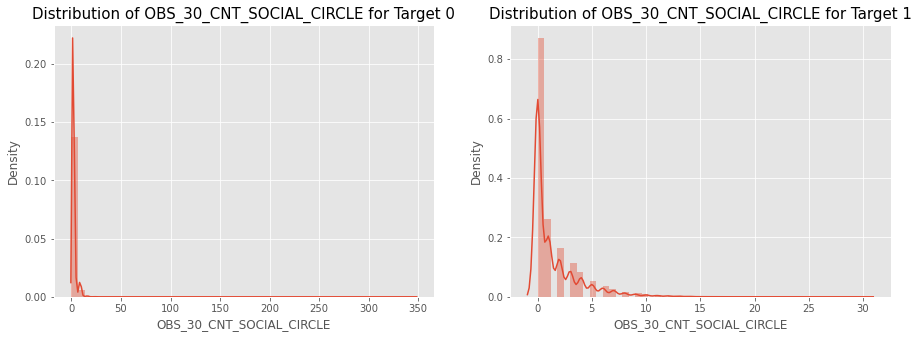

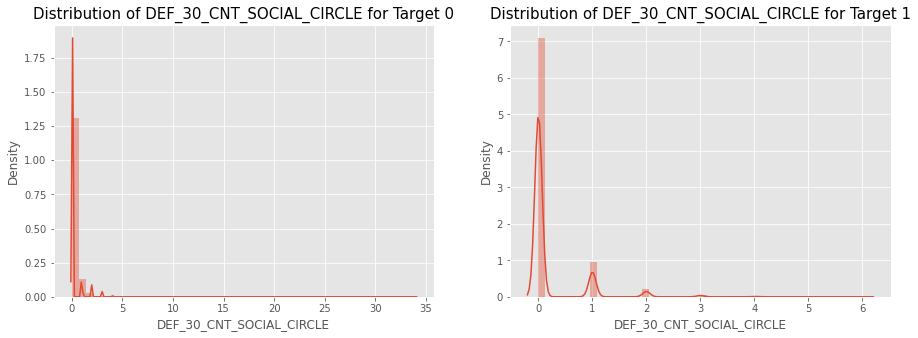

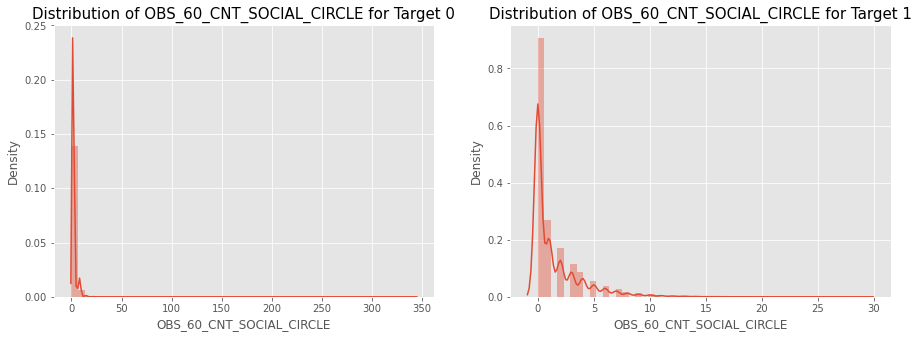

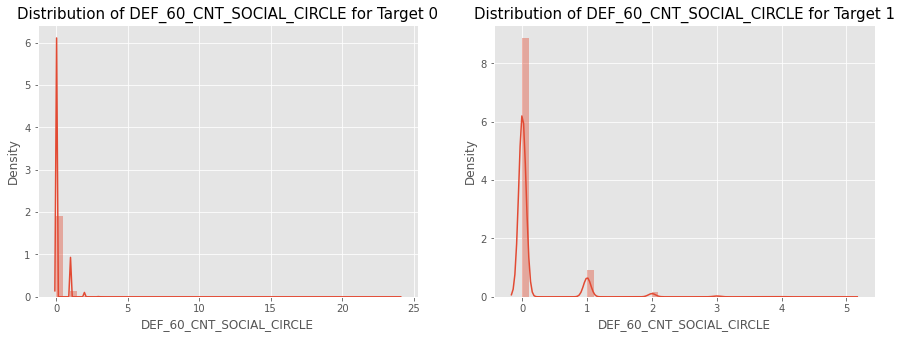

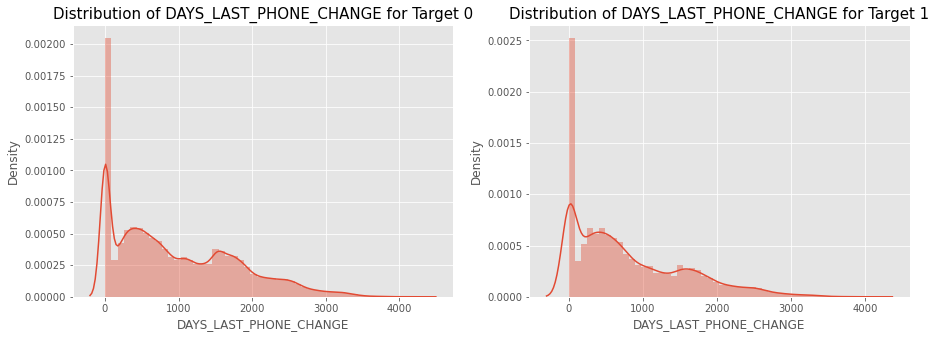

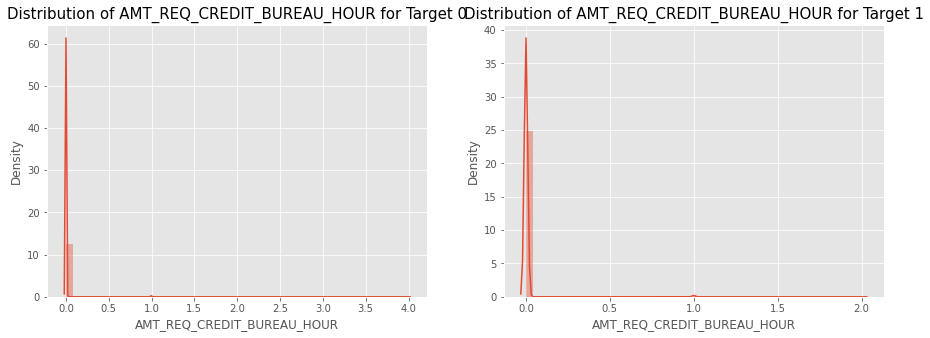

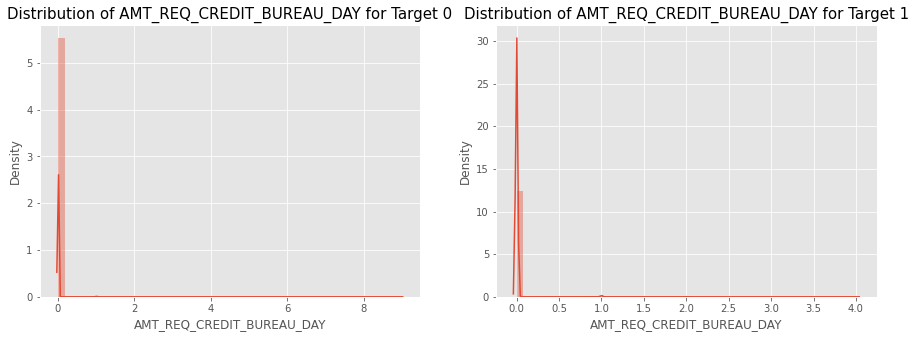

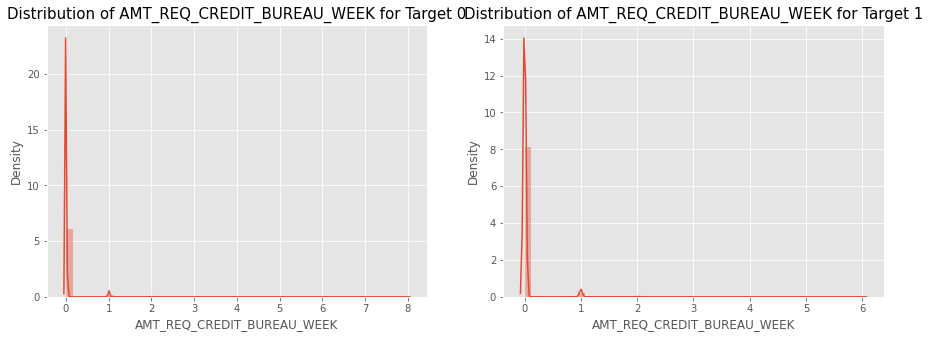

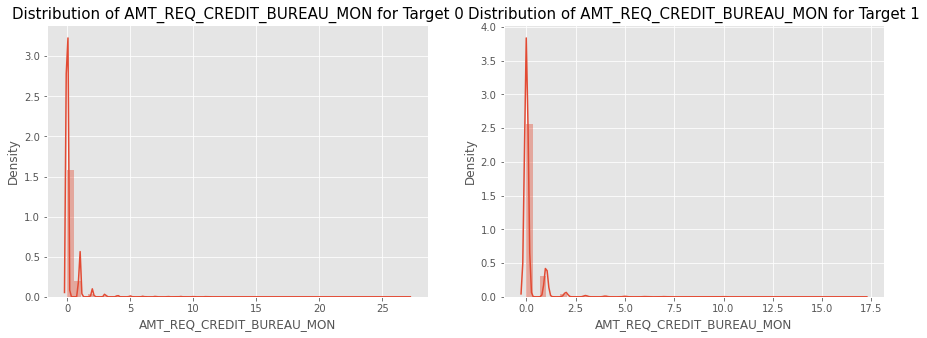

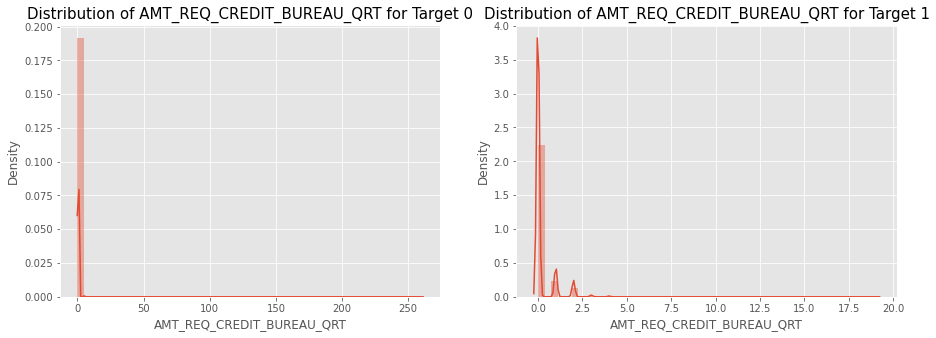

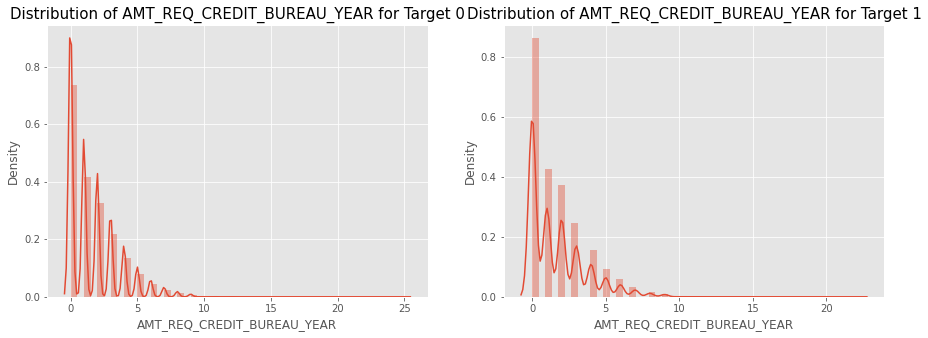

In [132]:
for i in Num:
    plotunidist(i)

Observations:
1. AMT_CREDIT - Appears lower for non-defaulter, which is a good sign as lesser default loss to the company.
2. AMT_ANNUITY is higher for defaulter, indicating high chance of defualt between 20,000 t0 30,000 range.
3. AGE_IN_YEARS Density of 30 years in Target 1 larger, indicating younger are defaulting moret
4. Lesser no of Target 1 OWN cars
5. EXT_SOURCE_2 is clearing showing that in non-defaulter, we have higher densiy of higher scores

## Bivariate Analysis

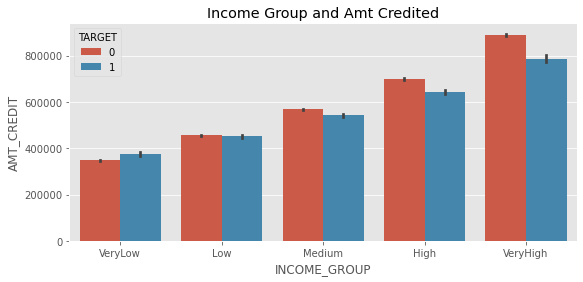

In [133]:
## Bivariate Categoric to Continuous 
f, ax = plt.subplots(figsize=(20,4))
plt.subplot(121)
plt.title("Income Group and Amt Credited")
plot_1=sns.barplot('INCOME_GROUP','AMT_CREDIT',data=application,hue="TARGET")

In [134]:
#Checking absolute values
res=pd.pivot_table(data=application, index='INCOME_GROUP',columns='TARGET',values='AMT_CREDIT', aggfunc="mean")
round(res,2)

TARGET                0          1
INCOME_GROUP                      
VeryLow       347868.46  373460.40
Low           456525.23  451343.70
Medium        568861.72  542580.16
High          699628.82  643297.93
VeryHigh      890186.33  786021.83

Observation
1. Though the maximum no of loans is given to Medium income group. Default value per loan is highest in High income group as the AMT_CREDIT is higher too. 
2. To protect themselves from these huge losses company needs to make policies and define some strict rules before approving higher incomer category loans.

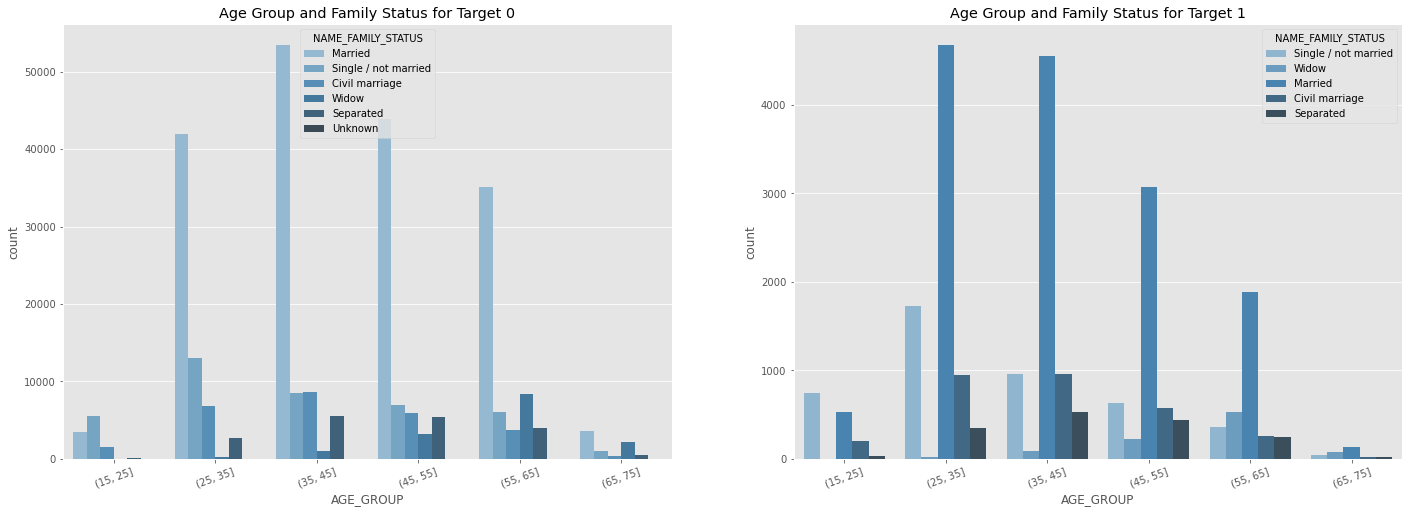

In [135]:
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
plt.title("Age Group and Family Status for Target 0")
sns.countplot('AGE_GROUP', hue ='NAME_FAMILY_STATUS' , data =application_0, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Age Group and Family Status for Target 1")
sns.countplot('AGE_GROUP', hue ='NAME_FAMILY_STATUS' , data =application_1, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)

plt.show()

The highest number of defaulter in Married applicant belong to age group of 25-35 and 35-45.

## Top 10 Correlations

In [136]:
#correlation for Target 0
app_corr_0=application_0.drop(cat, axis=1)
correlation_cat_0=app_corr_0.corr().abs()

In [137]:
corr_df = correlation_cat_0.where(np.triu(np.ones(correlation_cat_0.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)

corr_df.head(10)

Column1                   Column2  Correlation
457  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998510
160           AMT_GOODS_PRICE                AMT_CREDIT     0.986880
314           CNT_FAM_MEMBERS              CNT_CHILDREN     0.878570
484  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.859371
161           AMT_GOODS_PRICE               AMT_ANNUITY     0.776251
134               AMT_ANNUITY                AMT_CREDIT     0.771297
242            YEARS_EMPLOYED              AGE_IN_YEARS     0.626062
133               AMT_ANNUITY          AMT_INCOME_TOTAL     0.418949
159           AMT_GOODS_PRICE          AMT_INCOME_TOTAL     0.349363
107                AMT_CREDIT          AMT_INCOME_TOTAL     0.342799

In [138]:
#correlation for Target 1
app_corr_1=application_1.drop(cat, axis=1)
correlation_cat_1=app_corr_1.corr().abs()
corr_df = correlation_cat_1.where(np.triu(np.ones(correlation_cat_1.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df = round(corr_df.sort_values(by=['Correlation'], ascending=False),2)

corr_df.head(10)

Column1                   Column2  Correlation
457  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         1.00
160           AMT_GOODS_PRICE                AMT_CREDIT         0.98
314           CNT_FAM_MEMBERS              CNT_CHILDREN         0.89
484  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE         0.87
134               AMT_ANNUITY                AMT_CREDIT         0.75
161           AMT_GOODS_PRICE               AMT_ANNUITY         0.75
242            YEARS_EMPLOYED              AGE_IN_YEARS         0.58
458  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE         0.34
431  DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         0.33
268        YEARS_REGISTRATION              AGE_IN_YEARS         0.29

For both the dataframe top 10 correlation columns are same.

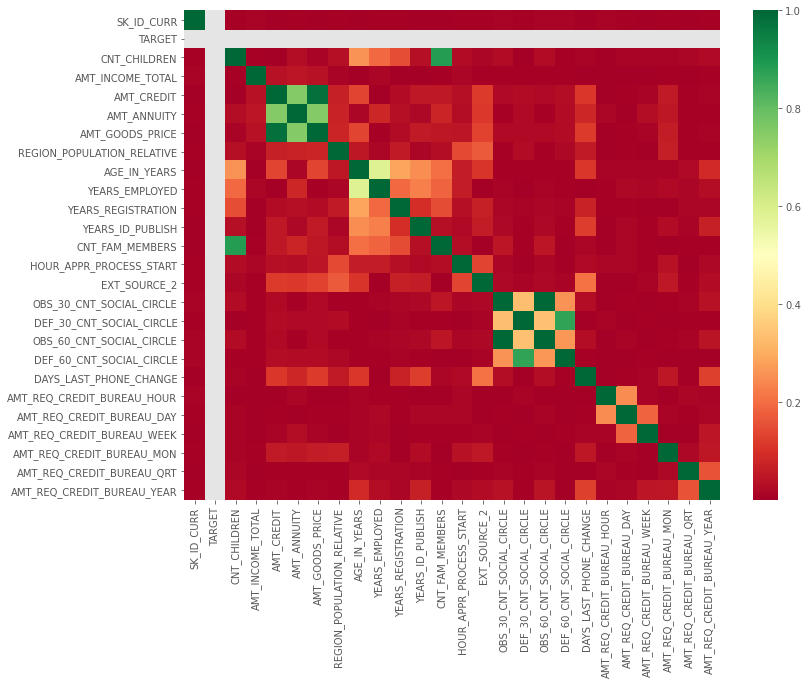

In [139]:
plt.figure(figsize=(12,9))
sns.heatmap(correlation_cat_1, cmap='RdYlGn')
plt.show()

Observations:
1. OBS_30_CNT_SOCIAL_CIRCLE',OBS_60_CNT_SOCIAL_CIRCLE' - denote the client's social surroundings with observable 30/60 DPD. These are definetly correlated for Target 1, signyfying that in approval process this parameter must be strongly looked into.
2. DEF_30_CNT_SOCIAL_CIRCLE is highly correlated with DEF_30_CNT_SOCIAL_CIRCLE for Target 1.
3. Years employed has an outlier value of 999 and this is skewing the graph
4. AMT_CREDIT is highly correlated with AMT_GOOD_PRICE and AMT_ANNUITY for Target 1. Hence bank should look into these variable before approving the loan.

## Previous Application

In [140]:
# Reading application.csv file from dataset location
papplication = pd.read_csv(r"C:\Users\dmis0\OneDrive\Documents\Python Scripts\Upgrad\EDA\Case Study\previous_application.csv")
papplication.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [141]:
papplication.shape

(1670214, 37)

In [142]:
papplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Data cleaning

In [143]:
# Checking % of missing values

papplication.isnull().sum()/len(papplication)*100


SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [144]:
# Since we need AMT_ANNUITY and AMT_GOODS_PRICE columns for analysis we will delete rows with null values
papplication = papplication.dropna(axis=0, subset=['AMT_ANNUITY'])
papplication = papplication.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
papplication.isnull().sum()/len(papplication)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               40.546489
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              40.546489
RATE_INTEREST_PRIMARY          99.522595
RATE_INTEREST_PRIVILEGED       99.522595
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                32.647474
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [145]:
# Columns with >20% NULL values

print(papplication.columns[(papplication.isnull().sum() * 100 / papplication.shape[0]) > 20])

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [146]:
#Dropping all >20% null value columns
dropcol=papplication.columns[(papplication.isnull().sum() * 100 / papplication.shape[0]) > 20]
papplication.drop(axis=1, columns=dropcol, inplace=True)
papplication.shape

(1246320, 26)

In [147]:
#Checking columns with NULL values

papplication.columns[(papplication.isnull().sum()>0)]

Index([], dtype='object')

In [148]:
papplication.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.246320e+06     1.246320e+06             1.246320e+06   
mean   2.492727e+05     2.326240e+05             1.258250e+01   
std    3.465843e+05     3.186729e+05             3.326113e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    5.157450e+04     5.220000e+04             1.000000e+01   
50%    1.161675e+05     1.125000e+05             1.200000e+01   
75%    2.700000e+05     2.475000e+05             1.500000e+01   
max    4.509688e+06     5.850000e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.246320e+06   1.246320e+06      1.246320e+06  1.246320e+06  
mean             9.978914e-01  -1.021855e+03      4.056201e+02  1.671954e+01  
std              4.587116e-02   7.864511e+02      8.246103e+03  1.448712e+01  
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  
25%              1.000000e+00  -1.534000e+03     -1.000000e+00  6.000000e+00  
50%              1.000000e+00  -7.660000e+02      2.700000e+01  1.200000e+01  
75%              1.000000e+00  -3.850000e+02      1.460000e+02  2.400000e+01  
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

In [149]:
#deleting some additional numerical var columns as we do not intend to use them for analysis and they dont seem relevant too

dropcol=['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']
papplication.drop(axis=1, columns=dropcol, inplace=True)
papplication.shape

(1246320, 22)

In [150]:
# Analysing values of object variable
for i in papplication.columns:
    if papplication[i].dtypes=="object":
        print(papplication[i].value_counts(normalize=True, dropna= False))
        print('\n\n')

Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: NAME_CONTRACT_TYPE, dtype: float64



SATURDAY     0.152194
FRIDAY       0.149213
WEDNESDAY    0.148734
TUESDAY      0.148228
MONDAY       0.146892
THURSDAY     0.146119
SUNDAY       0.108620
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64



Y    0.997222
N    0.002778
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64



XAP                                 0.629659
XNA                                 0.314679
Repairs                             0.019014
Other                               0.012436
Urgent needs                        0.006744
Buying a used car                   0.002304
Building a house or an annex        0.002161
Everyday expenses                   0.001921
Medicine                            0.001739
Payments on other loans             0.001545
Education                           0.001257
Journey                             0.000991
Purchase of electronic equipment    0.000846


## Since some columns are not required for analysis because
1. WEEKDAY_APPR_PROCESS_START -Not relevant
2. NAME_PRODUCT_TYPE -55% XNA values
3. NAME_CASH_LOAN_PURPOSE - more that 90% XNA / XAP values, 

4. NAME_GOODS_CATEGORY - hIGH XNA values
5. NAME_PAYMENT_TYPE - 19% XNA values
6. CODE_REJECT_REASON - 80% XAP values

In [151]:
# Deleting columns
dropcol=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON']
papplication.drop(axis=1, columns=dropcol, inplace=True)
papplication.shape

(1246320, 16)

## Univeriate Analysis

Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: NAME_CONTRACT_TYPE, dtype: float64


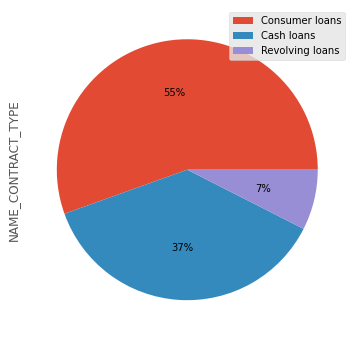



Y    0.997222
N    0.002778
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64


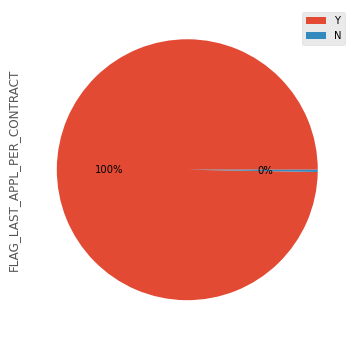



Approved        0.797498
Refused         0.193344
Canceled        0.008427
Unused offer    0.000730
Name: NAME_CONTRACT_STATUS, dtype: float64


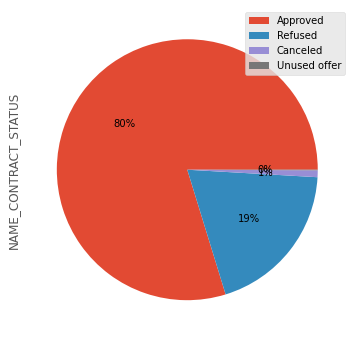



Repeater     0.677066
New          0.236334
Refreshed    0.085877
XNA          0.000723
Name: NAME_CLIENT_TYPE, dtype: float64


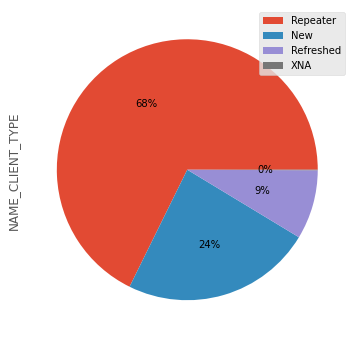



POS      0.554438
Cash     0.370341
Cards    0.074880
Cars     0.000341
Name: NAME_PORTFOLIO, dtype: float64


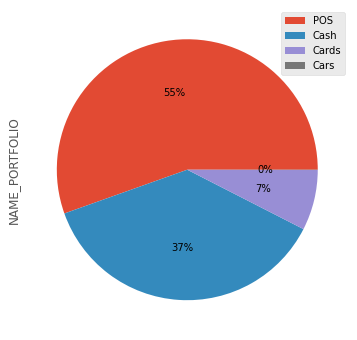



Country-wide                  0.359302
Credit and cash offices       0.317926
Stone                         0.166645
Regional / Local              0.085031
AP+ (Cash loan)               0.038082
Contact center                0.027836
Channel of corporate sales    0.004817
Car dealer                    0.000363
Name: CHANNEL_TYPE, dtype: float64


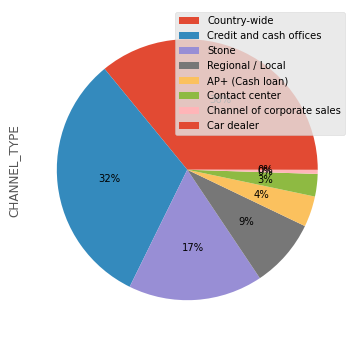



XNA                     0.389958
Consumer electronics    0.308245
Connectivity            0.190554
Furniture               0.045780
Construction            0.023736
Clothing                0.019091
Industry                0.015262
Auto technology         0.003989
Jewelry                 0.002173
MLM partners            0.000800
Tourism                 0.000412
Name: NAME_SELLER_INDUSTRY, dtype: float64


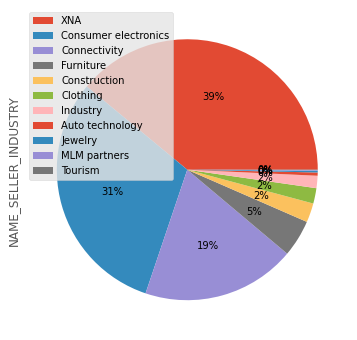



middle        0.309335
high          0.283497
low_normal    0.258437
XNA           0.074880
low_action    0.073850
Name: NAME_YIELD_GROUP, dtype: float64


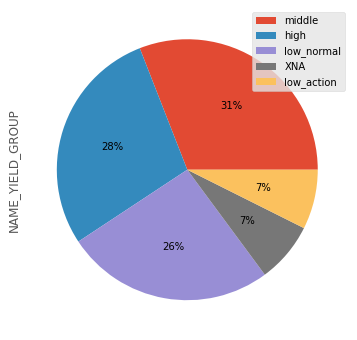



POS household with interest       0.206895
POS mobile with interest          0.152865
Cash X-Sell: middle               0.115446
Cash X-Sell: low                  0.104506
POS industry with interest        0.078757
POS household without interest    0.066522
Cash Street: high                 0.047852
Cash X-Sell: high                 0.047581
Card Street                       0.041335
Card X-Sell                       0.033545
Cash Street: middle               0.027808
Cash Street: low                  0.027147
POS mobile without interest       0.019322
POS other with interest           0.018255
POS industry without interest     0.010111
POS others without interest       0.002050
Name: PRODUCT_COMBINATION, dtype: float64


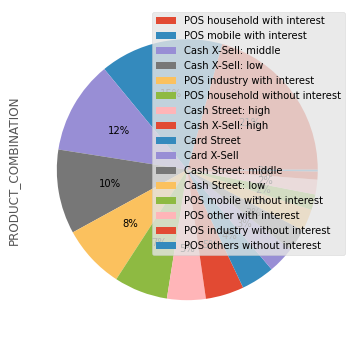

In [152]:
#Checking all object types Variables 
for i in papplication.columns:
    if papplication[i].dtypes=="object":
        print(papplication[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        papplication[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None,autopct = "%1.0f%%")
        plt.legend()
        plt.show()
        print("\n")
        

Observation:
1. This dataframe has a differnt type of loan called Consumer Loan, which was not there in Application data frame. 55% of loans are consumer loans. 37% cash loans and rest revolving
2. Approved loans are 80% and refused, cancelled, unused - rest. (Data imbalance)
3. In NAME_CLIENT_TYPE 68% are repeaters and also has some null values showing as XNA
4. In NAME_PORTFOLIO 55% of the applicants have taken loan for POS purchase.
5. In Name seller industry has 37% XNA values, Consumer electronics is next highest category at 30%

In [153]:
papplication.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE   CNT_PAYMENT  
count  1.246320e+06     1.246320e+06  1.246320e+06  
mean   2.492727e+05     2.326240e+05  1.671954e+01  
std    3.465843e+05     3.186729e+05  1.448712e+01  
min    0.000000e+00     0.000000e+00  0.000000e+00  
25%    5.157450e+04     5.220000e+04  6.000000e+00  
50%    1.161675e+05     1.125000e+05  1.200000e+01  
75%    2.700000e+05     2.475000e+05  2.400000e+01  
max    4.509688e+06     5.850000e+06  8.400000e+01

We can replace these values with their respective median to get rid of skewness if we want or we can delete it.

## Bivariate Analysis

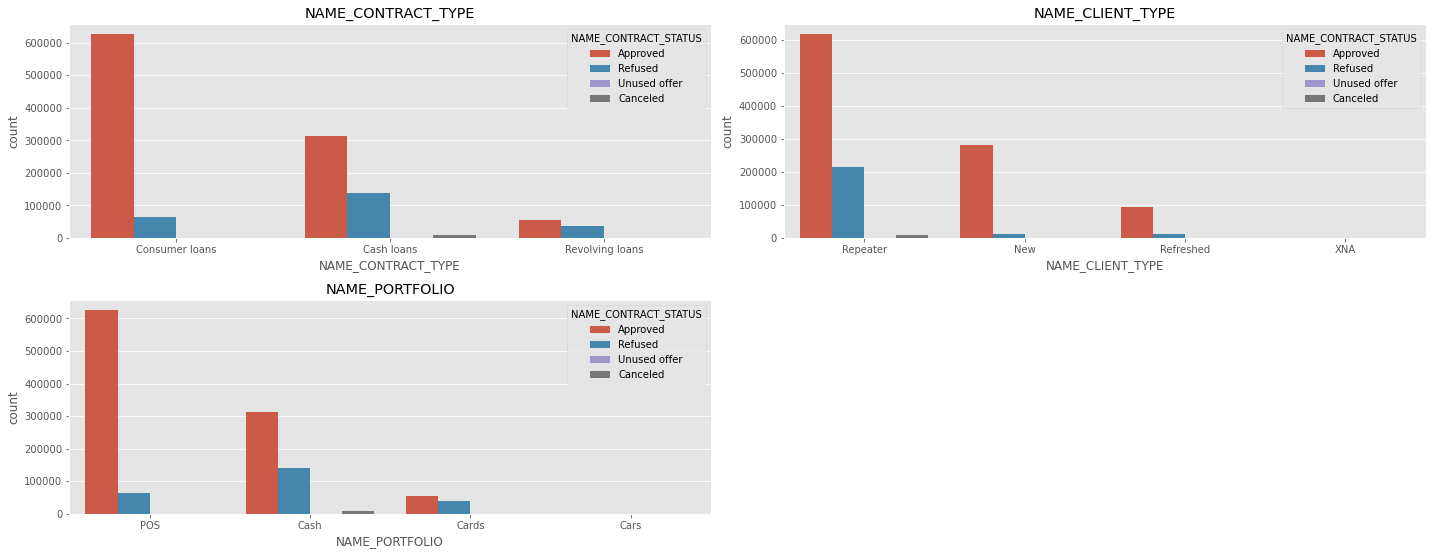

In [154]:
cols=['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']


a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,15))

for i in cols:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.countplot(x=i, data=papplication, hue='NAME_CONTRACT_STATUS')
    c = c + 1

fig.tight_layout()
plt.show()

Observation:
1. Consumer loan has largest no of applicants in approved category. 
2. More cash loans have been refused than consumer loans.
3. The bank has refused most number of time to repeaters catagory.
4. In NAME_PORTFOLIO more cash laons have been refused than POS.

## Top 10 correlations

In [155]:
papplication_corr=papplication.drop(axis=1,columns=['SK_ID_CURR','SK_ID_PREV'] )

correlation=papplication_corr.corr().abs()

In [156]:
corr_prev = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_prev.columns=['Column1','Column2','Correlation']
corr_prev.dropna(subset=['Correlation'],inplace=True)
corr_prev = corr_prev.sort_values(by=['Correlation'], ascending=False)

corr_prev

Column1          Column2  Correlation
16  AMT_GOODS_PRICE  AMT_APPLICATION     0.999883
17  AMT_GOODS_PRICE       AMT_CREDIT     0.993028
11       AMT_CREDIT  AMT_APPLICATION     0.992965
15  AMT_GOODS_PRICE      AMT_ANNUITY     0.820895
5   AMT_APPLICATION      AMT_ANNUITY     0.820831
10       AMT_CREDIT      AMT_ANNUITY     0.814884
22      CNT_PAYMENT       AMT_CREDIT     0.700323
21      CNT_PAYMENT  AMT_APPLICATION     0.672276
23      CNT_PAYMENT  AMT_GOODS_PRICE     0.672129
20      CNT_PAYMENT      AMT_ANNUITY     0.401020

<Figure size 864x576 with 0 Axes>

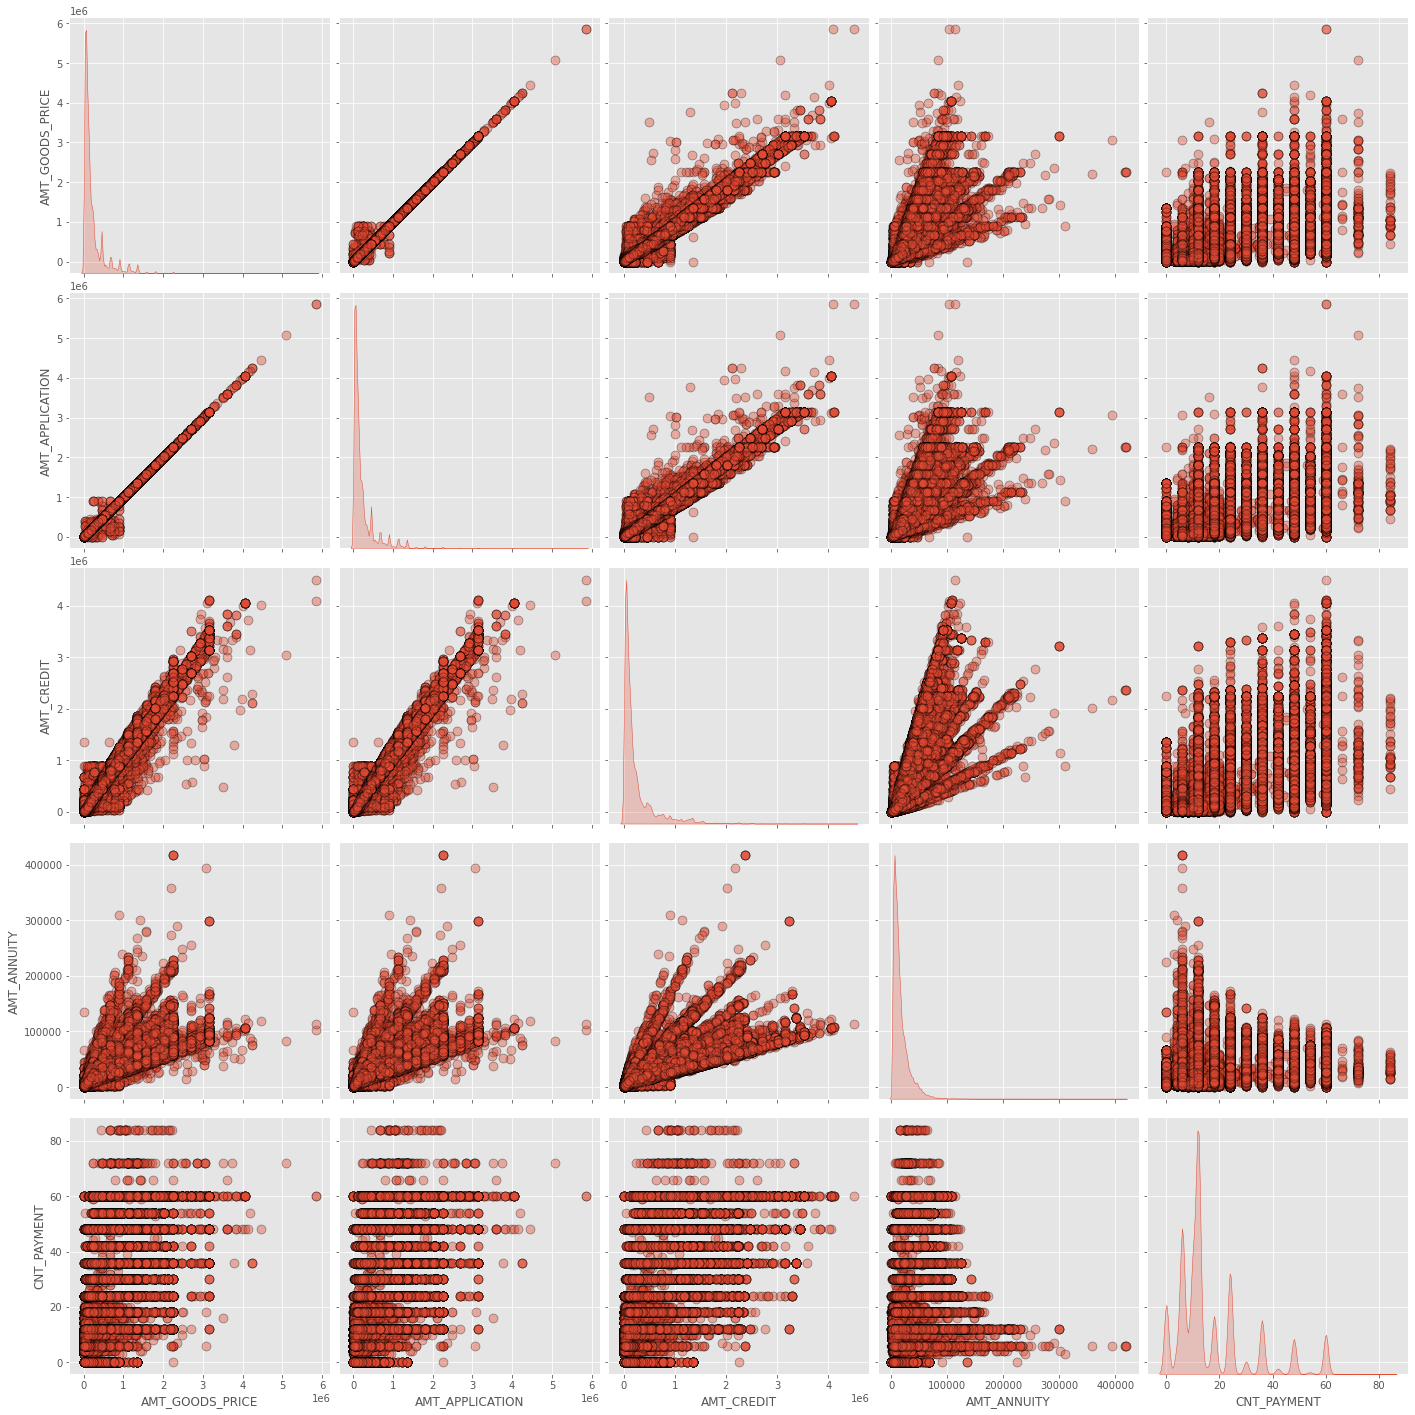

In [157]:
plt.figure(figsize=[12,8])
sns.pairplot(papplication[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']],
            diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show() 

Observations:
1. There is very strong and positive correlation between AMT_GOODS_PRICE, AMT_ANNUITY, AMT_APPLICATION - as expected. Higher the value of good purchased more there will be need of loan and surely all these will correlate
2. Similary, we can see the high correlation between AMT_Credit and AMT_GOOD_PRICE.


## Merged Data

In [158]:
#checking if any duplicate values in SK_ID_PREV
dup = papplication[papplication.duplicated(subset='SK_ID_CURR')]
dup.shape

(908809, 16)

In [159]:
mg_df=pd.merge( application, papplication, how='left', on=["SK_ID_CURR"])


In [160]:
mg_df.shape

(1078854, 72)

### Analysis

In [161]:
# Plotting Name contract status to check % of default, ie Target 0 and 1

contract=mg_df['NAME_CONTRACT_STATUS'].unique()
contract

array(['Approved', 'Refused', nan, 'Canceled', 'Unused offer'],
      dtype=object)

Target 0 and 1 for :  Approved
0    0.924108
1    0.075892
Name: TARGET, dtype: float64


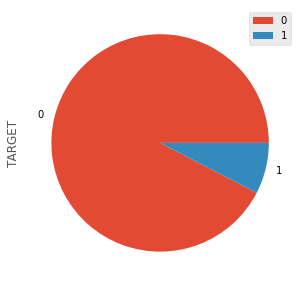

Target 0 and 1 for :  Refused
0    0.884182
1    0.115818
Name: TARGET, dtype: float64


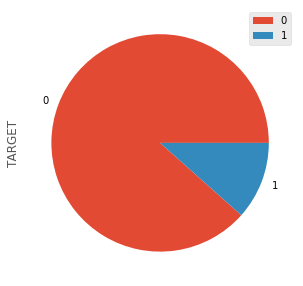

No handles with labels found to put in legend.


Target 0 and 1 for :  nan
Series([], Name: TARGET, dtype: float64)


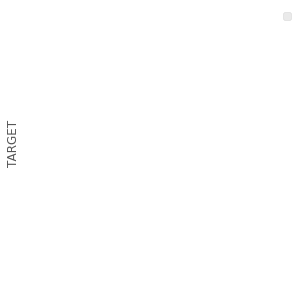

Target 0 and 1 for :  Canceled
0    0.917609
1    0.082391
Name: TARGET, dtype: float64


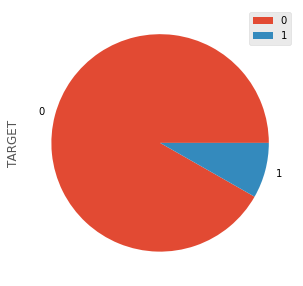

Target 0 and 1 for :  Unused offer
0    0.895141
1    0.104859
Name: TARGET, dtype: float64


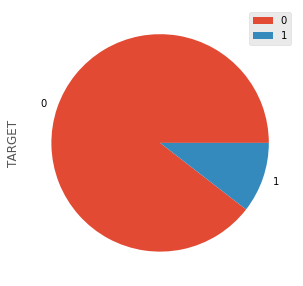

In [162]:
for i in contract:
    print("Target 0 and 1 for : ",i)
    plt.figure(figsize=[8,5])
    print(mg_df[(mg_df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts(normalize=True))
    mg_df[(mg_df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts().plot.pie(normalize=True)
    plt.legend()
    plt.show()
    

Observations:
1. Out of all the approved loan 7.6% of have defaulted.
2. Interesting thig to notice here is that previous applications whose loan applications were Refused or Cancelled also have defaulter which means that regardless of their previous record they have been given loan. Bank should look into this into more detail to understand what changed in the loan approval process that they were given loan.

In [163]:
# Number of Defaults in approved cases
approvedDefault=mg_df[(mg_df['NAME_CONTRACT_STATUS']=="Approved") & (mg_df['TARGET']==1)]
approvedDefault.shape

(64400, 72)

## Bivariate Analysis

In [164]:
def plotuni_combined(Varx,Vary):
    # 100% bar chart
    plt.style.use('ggplot')
    sns.despine
    NewData = mg_df.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    NewData=NewData.div(NewData.sum(axis=1),axis='rows')*100
    sns.set()
    NewData.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

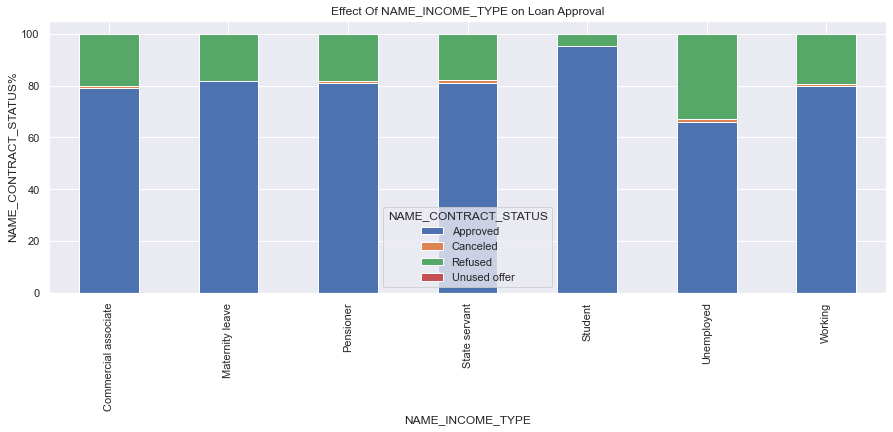

In [165]:
plotuni_combined("NAME_INCOME_TYPE",'NAME_CONTRACT_STATUS')

We can see that the highest percentage of loan approved is in the student category. Which make sense too, since student apply for education loan to study abroad or to do higher studies.

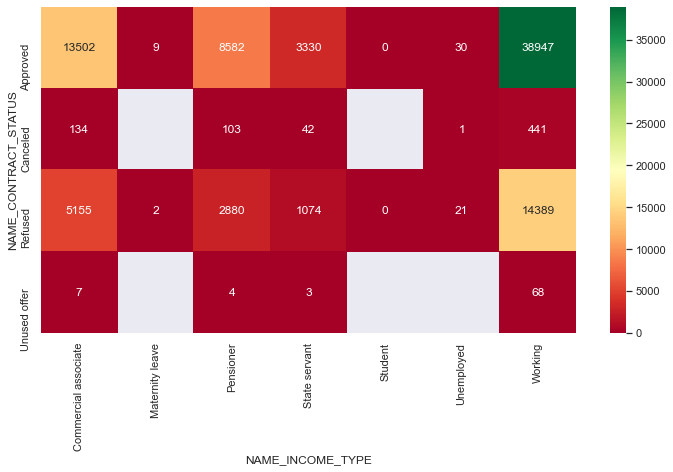

In [166]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on Target
#Since Target 1 is default, higher on the above matrix shows correlation to default
res=pd.pivot_table(data=mg_df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='RdYlGn', fmt="g")
plt.show()

Observations:
1. We can see that the highest number of defaulter applicant belongs to Working category.
2. Working applicant with Approved status have defaulted in highest numbers
3. The matter of concern should be, 14,389 applicants of working class who were REFUSED earlier and now have defaulted.As mentioned above company should look into this to find out what changed that these applicant got their loan approved at the fist place.

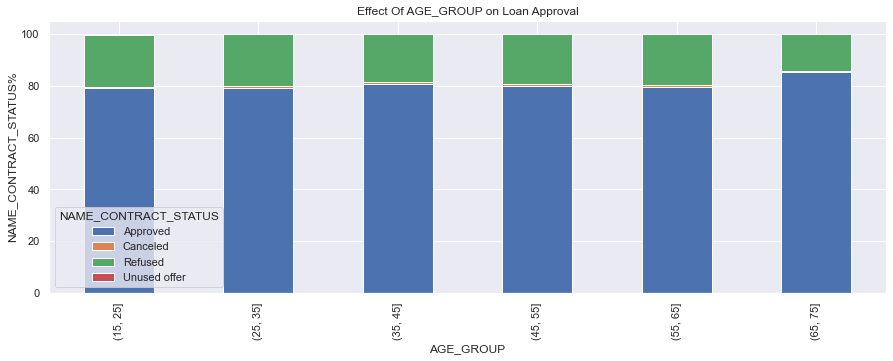

In [167]:
plotuni_combined("AGE_GROUP",'NAME_CONTRACT_STATUS')

Interesting thing to not here is approval rate is higher amongst the age group of 65-75.

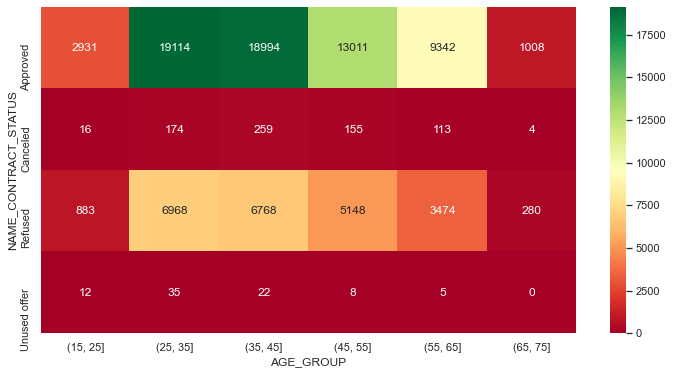

In [168]:
#Checking "NAME_CONTRACT_STATUS", "AGE_GROUP",aggregating on Target
#Since Target 1 is default, higher on the above matrix shows correlation to default
res=pd.pivot_table(data=mg_df,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='RdYlGn', fmt="g")
plt.show()

Observations:
1. As we have seen earlier that loans approved of age group 25-55 have defaulted more ofted than not.
2. Comapny should look into their policies which has approved people with Refused or cancelled category in previous application, since they are in current defaulters.

In [169]:
cols=['INCOME_GROUP','AGE_GROUP','CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE',"ORGANIZATION_TYPE",'OWN_CAR_flag','OWN_REALTY_flag' ]

for i in cols:
    print(approvedDefault[i].value_counts(normalize=True))
    print('\n')
    



Medium      0.291770
High        0.261304
Low         0.214581
VeryHigh    0.137997
VeryLow     0.094348
Name: INCOME_GROUP, dtype: float64


(25, 35]    0.296801
(35, 45]    0.294938
(45, 55]    0.202034
(55, 65]    0.145062
(15, 25]    0.045512
(65, 75]    0.015652
Name: AGE_GROUP, dtype: float64


F    0.59222
M    0.40778
Name: CODE_GENDER, dtype: float64


Working                 0.604767
Commercial associate    0.209658
Pensioner               0.133261
State servant           0.051708
Unemployed              0.000466
Maternity leave         0.000140
Name: NAME_INCOME_TYPE, dtype: float64


Laborers                 0.314332
Sales staff              0.168312
Drivers                  0.111941
Core staff               0.090577
Managers                 0.070796
Security staff           0.038783
High skill tech staff    0.038361
Cooking staff            0.034270
Medicine staff           0.032667
Accountants              0.026530
Cleaning staff           0.024442
Low-skill Laborers     



High Number of defaulter are applicant who belong to below categories:
1. 'INCOME_GROUP' - Medium income 
2. 'AGE_GROUP' - 25-35, followed by 35-45
3. 'NAME_INCOME_TYPE' - Working
4. 'OCCUPATION_TYPE' - Labourers 31%
5. 'ORGANIZATION_TYPE' - Business type 3
6. 'OWN_CAR_flag' - 31% dont have car
7. 'OWN_REALTY_flag' - 29% dont have own home